# Database Management Systems

**A database management system (DBMS) is software that manages large collections of data**

An application that is developed in Python or another language can be written to use a DBMS to manage its data. Rather than retrieving or manipulating the data directly, the application can send instructions to the DBMS. The DBMS carries out those instructions and sends the results back to the application

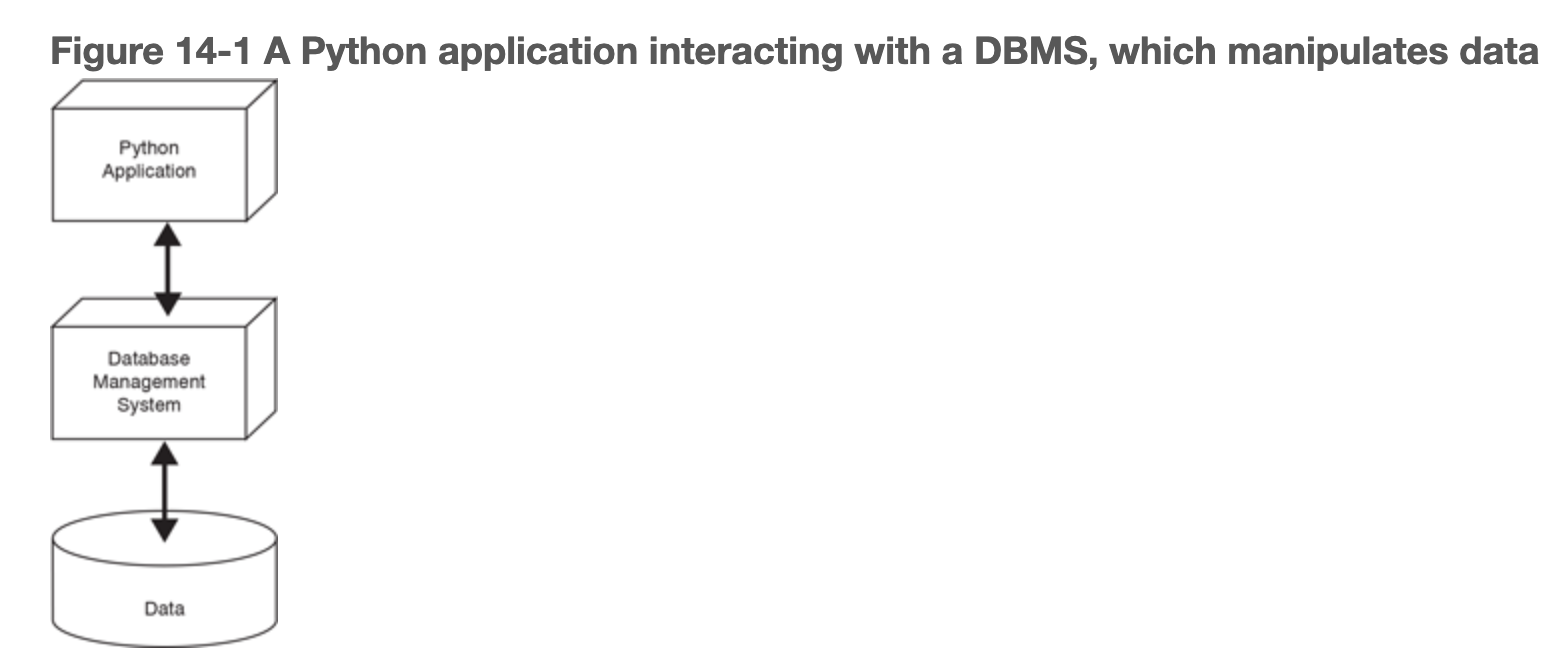

The topmost layer of software, which—in this case—is written in Python, interacts with the user. It also sends instructions to the next layer of software, the DBMS. The DBMS works directly with the data and sends the results of operations back to the application.

**When a Python application interacts with a DBMS, the Python application must construct SQL statements as strings, and then use a library method to pass those strings to the DBMS**

**To use SQLite in Python, you must import the sqlite3 module**

**TABLES, ROWS, AND COLUMNS**

Data that is stored in a database is organized into tables, rows, and columns

- table holds a collection of related data.
- A row is a complete set of data about a single item. The data that is stored in a row is divided into columns
- Each column holds an individual piece of data about the item.

**COLUMN DATA TYPES**

When you create a database table, you must specify a data type for the columns. The data types that you can choose from are not Python data types, however. They are the data types that are provided by the DBMS

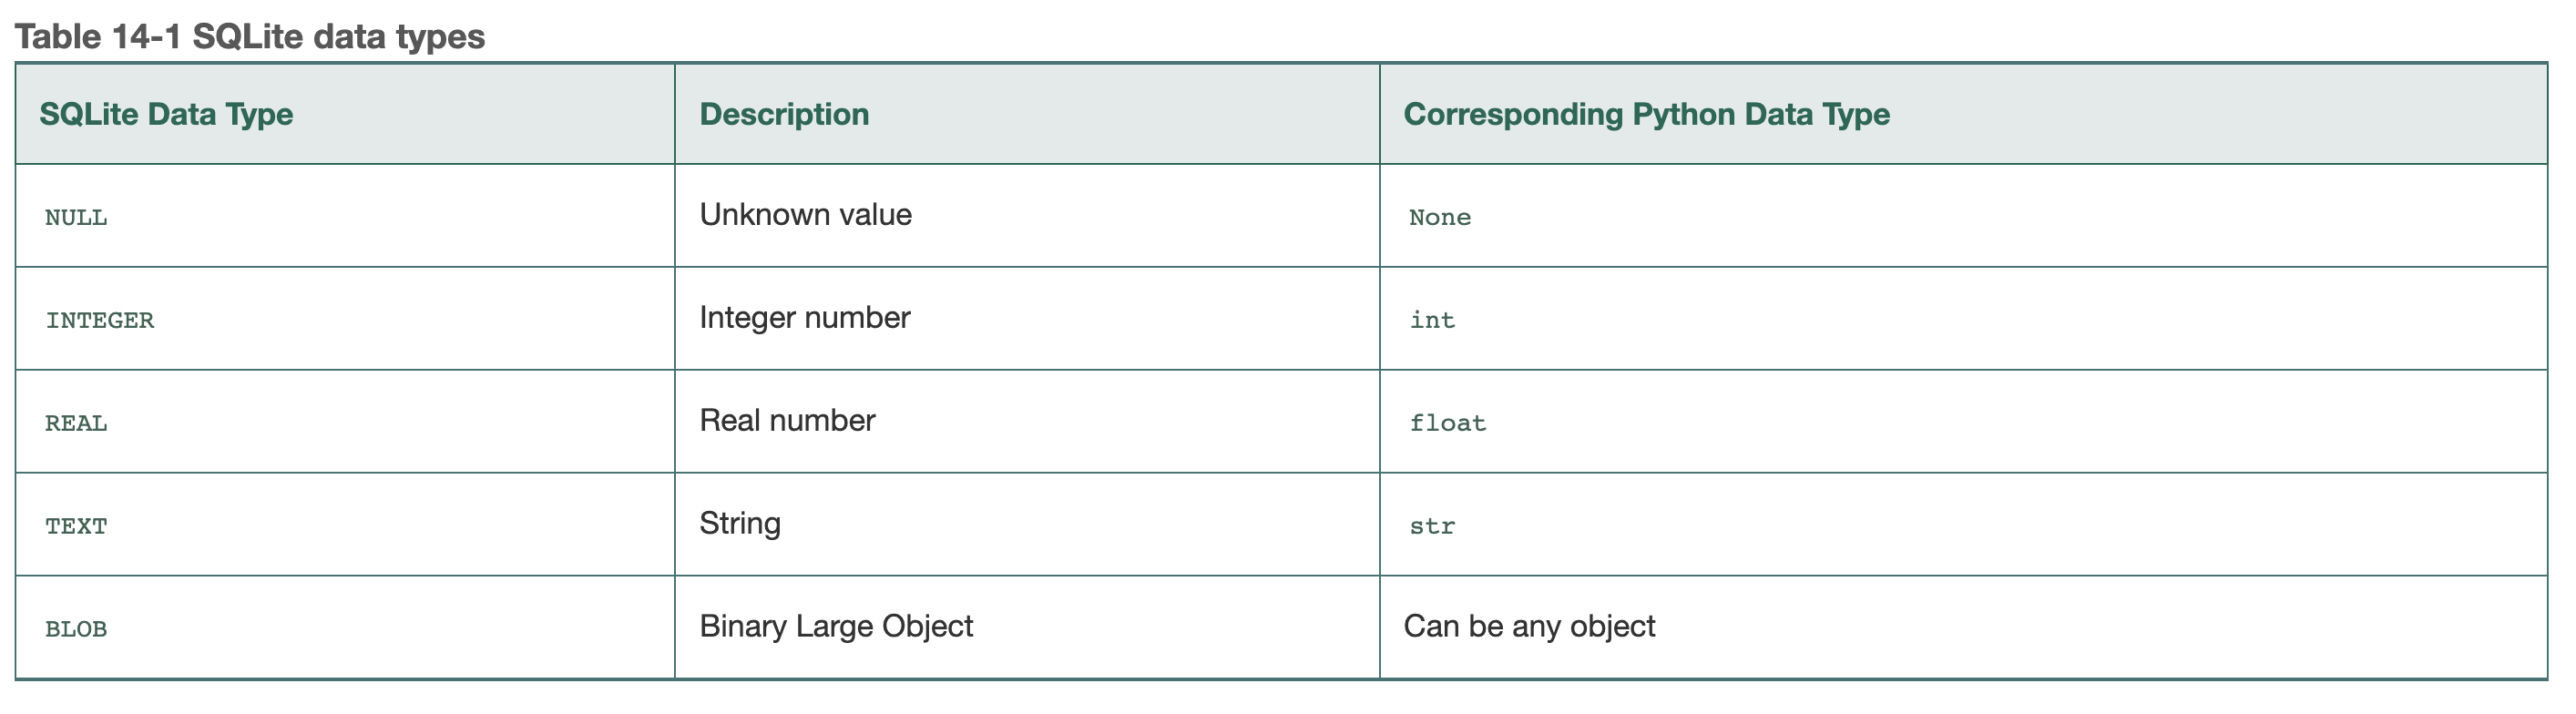

NULL—The NULL data type can be used when the value is unknown or missing. When Python reads a NULL column value into memory, the value is converted to the value None.

INTEGER—The INTEGER data type holds a signed integer value. When Python reads an INTEGER column value into memory, the value is converted to an int value.

REAL—The REAL data type holds a real number. When Python reads a REAL column value into memory, the value is converted to a float value.

TEXT—The TEXT data type holds a string. When Python reads a TEXT column value into memory, the value is converted to an str value.

BLOB—The BLOB data type holds an object of any type. For example, it can hold an array, or an image. When Python reads a BLOB column value into memory, the value is converted to a bytes object, which is an immutable sequence of bytes.

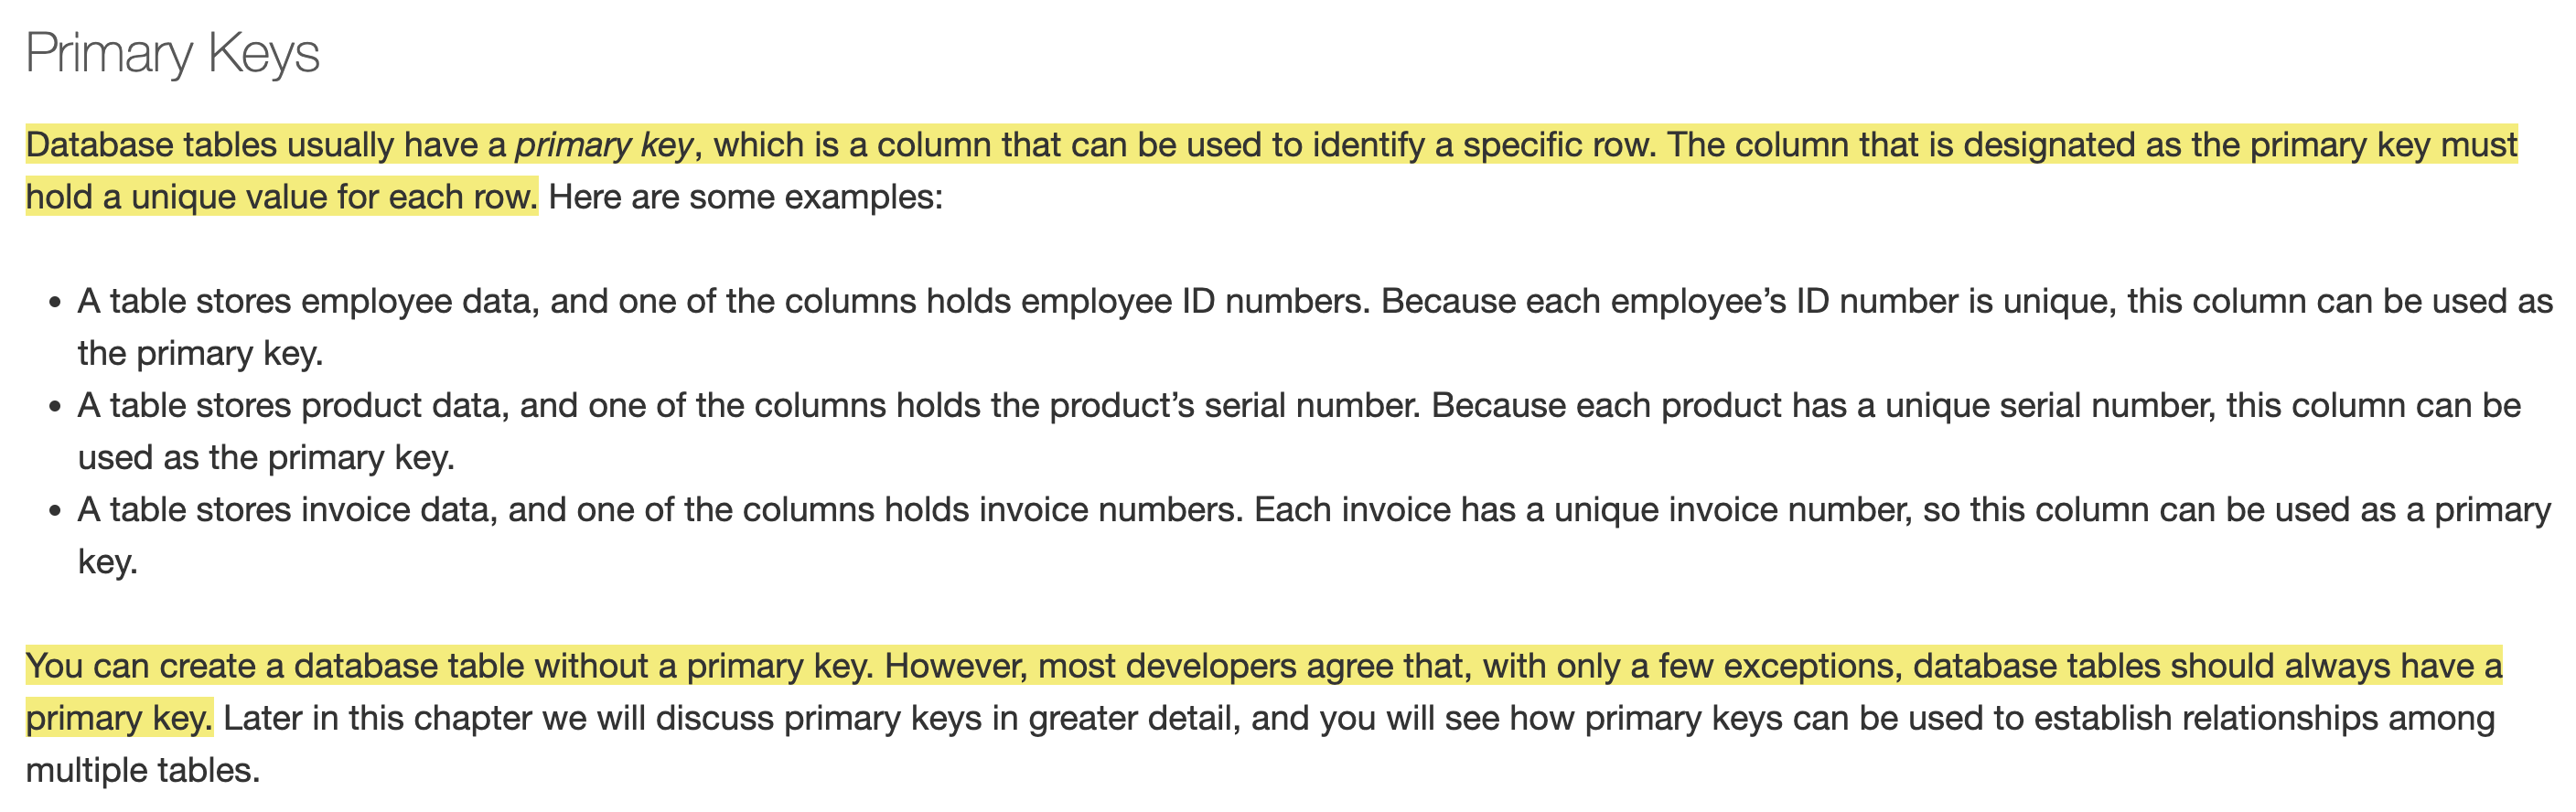

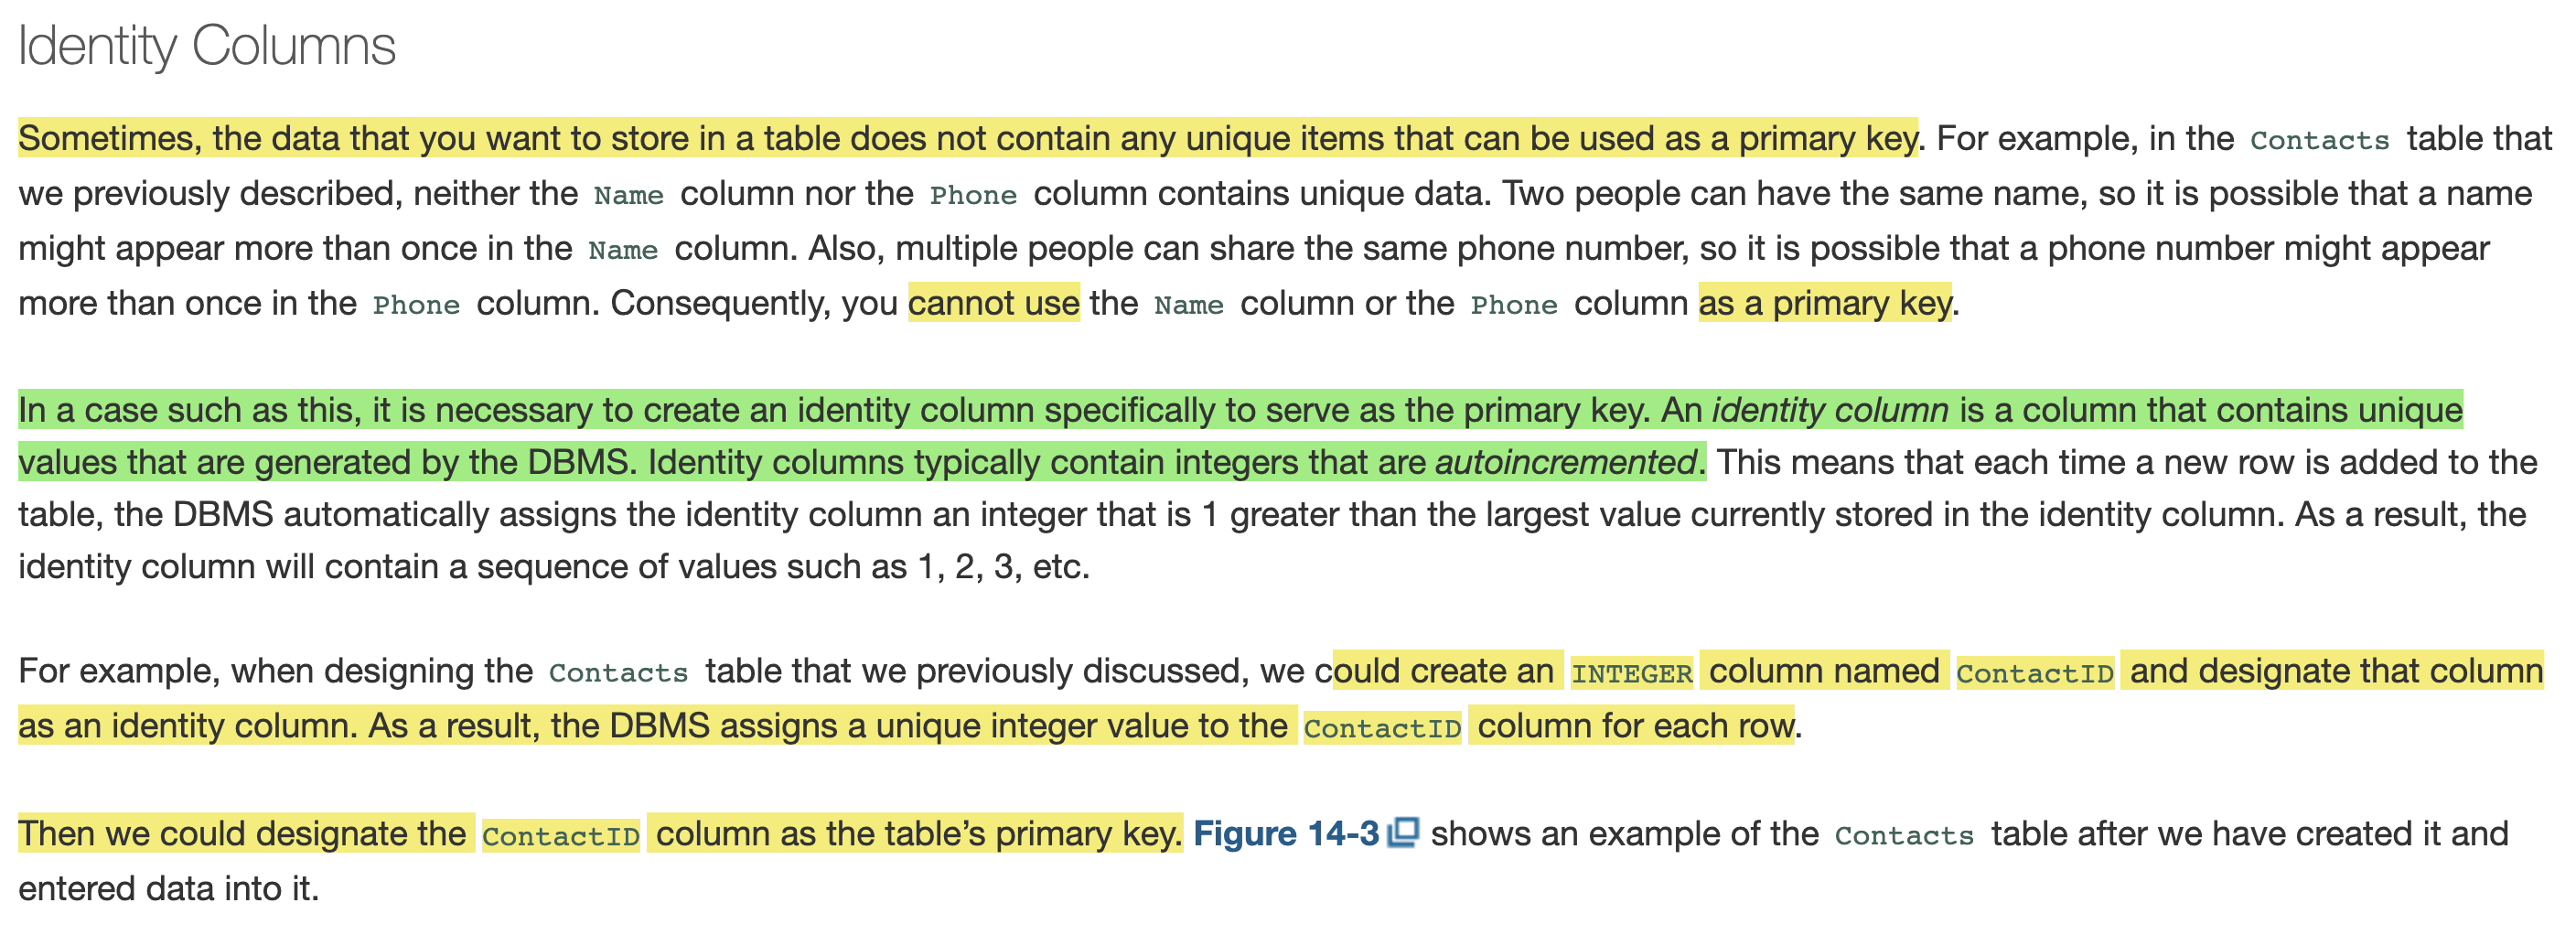

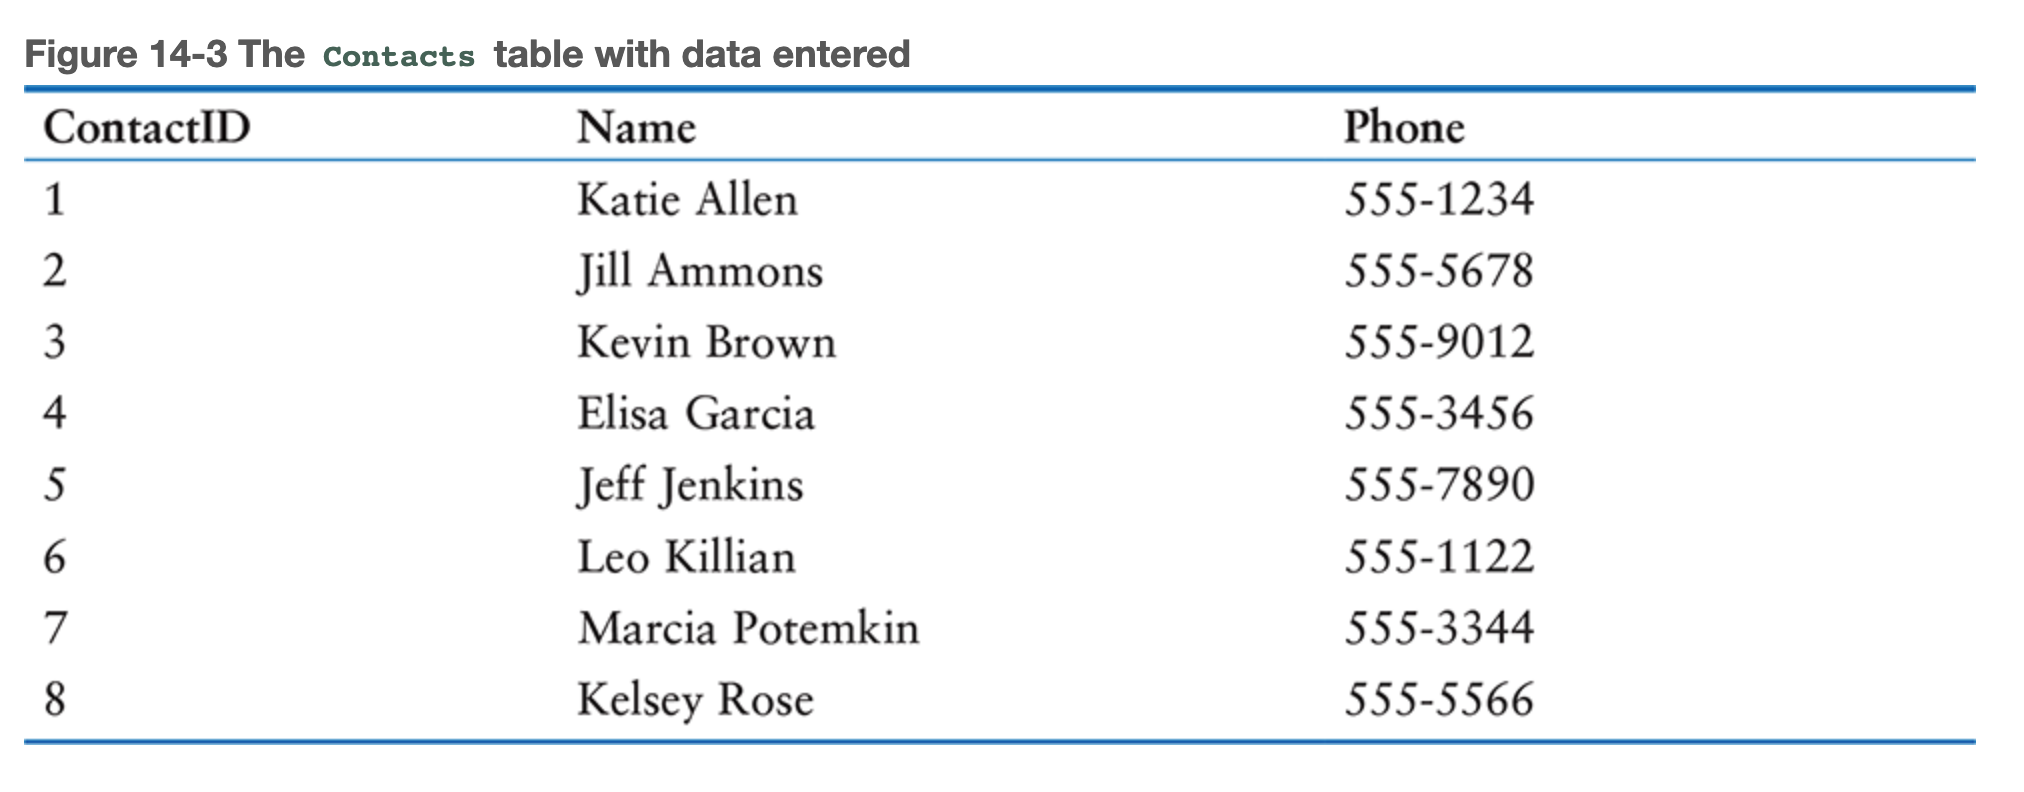

**ALLOWING NULL VALUES**

Sometimes it is okay for a column to be left empty. Some columns, however, such as primary keys, must contain a value. When you are designing a table, you can apply a constraint, or rule, that prevents a column from being null. 

**OPENING AND CLOSING A DATABASE CONNECTION WITH SQLite**

**Before you can work with a database, you must connect to the database. When you are finished working with the database, you must close the connection.**

Typical process of using an SQLite database:

- Connect to the database: An SQLite database is stored in a file on the system’s disk. This step establishes a connection between the program and a specific database file. If the database file does not exist, it will be created.
- Get a cursor for the database: A cursor is an object that is able to access and manipulate the data in a database.
- Perform operations on the database: Once you have a cursor, you can access and modify the data in the database as needed. You can use the cursor to retrieve data, insert new data, update existing data, and delete data.
- Commit changes to the database: When you make changes to a database, those changes aren’t actually saved in the database until you commit them. After performing any operations that modify the contents of a table, be sure to commit those changes to the database.
- Close the connection to the database: When you are finished using the database, you should close the connection.

In [5]:
import sqlite3


def main():
    conn = sqlite3.connect('contacts.db')
    cur = conn.cursor()
    
    # Insert code here to perform operations on the database.
    
    conn.commit()
    conn.close()
    
    # Execute the main function.
if __name__ == '__main__':
    main()

The first statement imports the sqlite3 module. Then, the second statement call’s the module’s connect function, passing the name of the desired database file, contacts.db, as an argument. The connect function will open a connection to the database file. If the file does not exist, the function will create it and establish a connection to it. The function returns a Connection object that we will need to refer to later, so it is assigned to the variable conn.

**When the connect function creates a database file, the database will be empty and will contain no tables**

We call the Connection object’s cursor method to get a cursor for the database

Cursor method returns a Cursor object that has the ability to access and modify the database. Will use the Cursor object to perform operations on the database’s tables such as retrieving rows, inserting rows, modifying rows, and deleting rows.

The last step is to close the database connection with the Connection object’s close method

# Specifying the Database’s Location on Disk

**When you pass a file name that does not contain a path as an argument to the connect function, the DBMS assumes the file’s location is the same as that of the program.**

If you want to open a connection to a database file in a different location, you can specify a path as well as a filename in the argument that you pass to the connect function. If you specify a path in a string literal (particularly on a Windows computer), be sure to prefix the string with the letter r.

**sqlite3.connect(r'C:\Users\Hannah\temp\contacts.db')**


# Passing SQL Statements to the DBMS

We mentioned earlier that you perform database operations by constructing SQL statements as strings, and then using a library method to pass those strings to the DBMS. With SQLite, you use the Cursor object’s execute method to pass an SQL statement to the DBMS.

**cur.execute(SQLstring)** 

In the general format, cur is the name of a Cursor object and SQLstring is either a string literal or a string variable that contains an SQL statement. The execute method sends the string to the SQLite DBMS which, in turn, executes it on the database.

# Creating and Deleting Tables

**To create a table in a database, you use the SQL statement CREATE TABLE. To delete a table, you use the SQL statement DROP TABLE.**

Once you have created a new database using the sqlite3 module’s connect function, you must add one or more tables to the database. To add a table, you will use the SQL statement CREATE TABLE

**CREATE TABLE TableName (ColumnName1 DataType1, ColumnName2 DataType2, etc...)** 

TableName is the name of the table that you are creating. ColumnName1 is the name of the first column, and DataType1 is the SQL data type for the first column. ColumnName2 is the name of the second column, and DataType2 is the SQL data type for the second column. This sequence repeats for all the columns in the table.

**CREATE TABLE Inventory (ItemName TEXT, Price REAL)**

The table has two columns: ItemName and Price. The data type of the ItemName column is TEXT and the data type of the Price column is REAL. You can designate a column as the primary key by listing the PRIMARY KEY constraint after the column’s data type. Format is:

**CREATE TABLE TableName (ColumnName1 DataType1 PRIMARY KEY,
                         ColumnName2 DataType2,
                         etc...)**
                         
**IMPORTANT----> When designating a primary key, it is also a good idea to use the NOT NULL constraint. The NOT NULL constraint specifies that the column cannot be left empty.When you designate a column as the primary key, you need to make sure that no two rows in the table can have the same value in that column**

**CREATE TABLE TableName (ColumnName1 DataType1 PRIMARY KEY NOT NULL,
                         ColumnName2 DataType2,
                         etc...)**
                         
In SQLite, any column that is designated both as INTEGER and PRIMARY KEY will also become an autoincremented identity column.

NOTE: SQL statements are free form, which means that tabs, newlines, and spaces between the keywords are ignored. In addition, SQL keywords and table names are case insensitive.

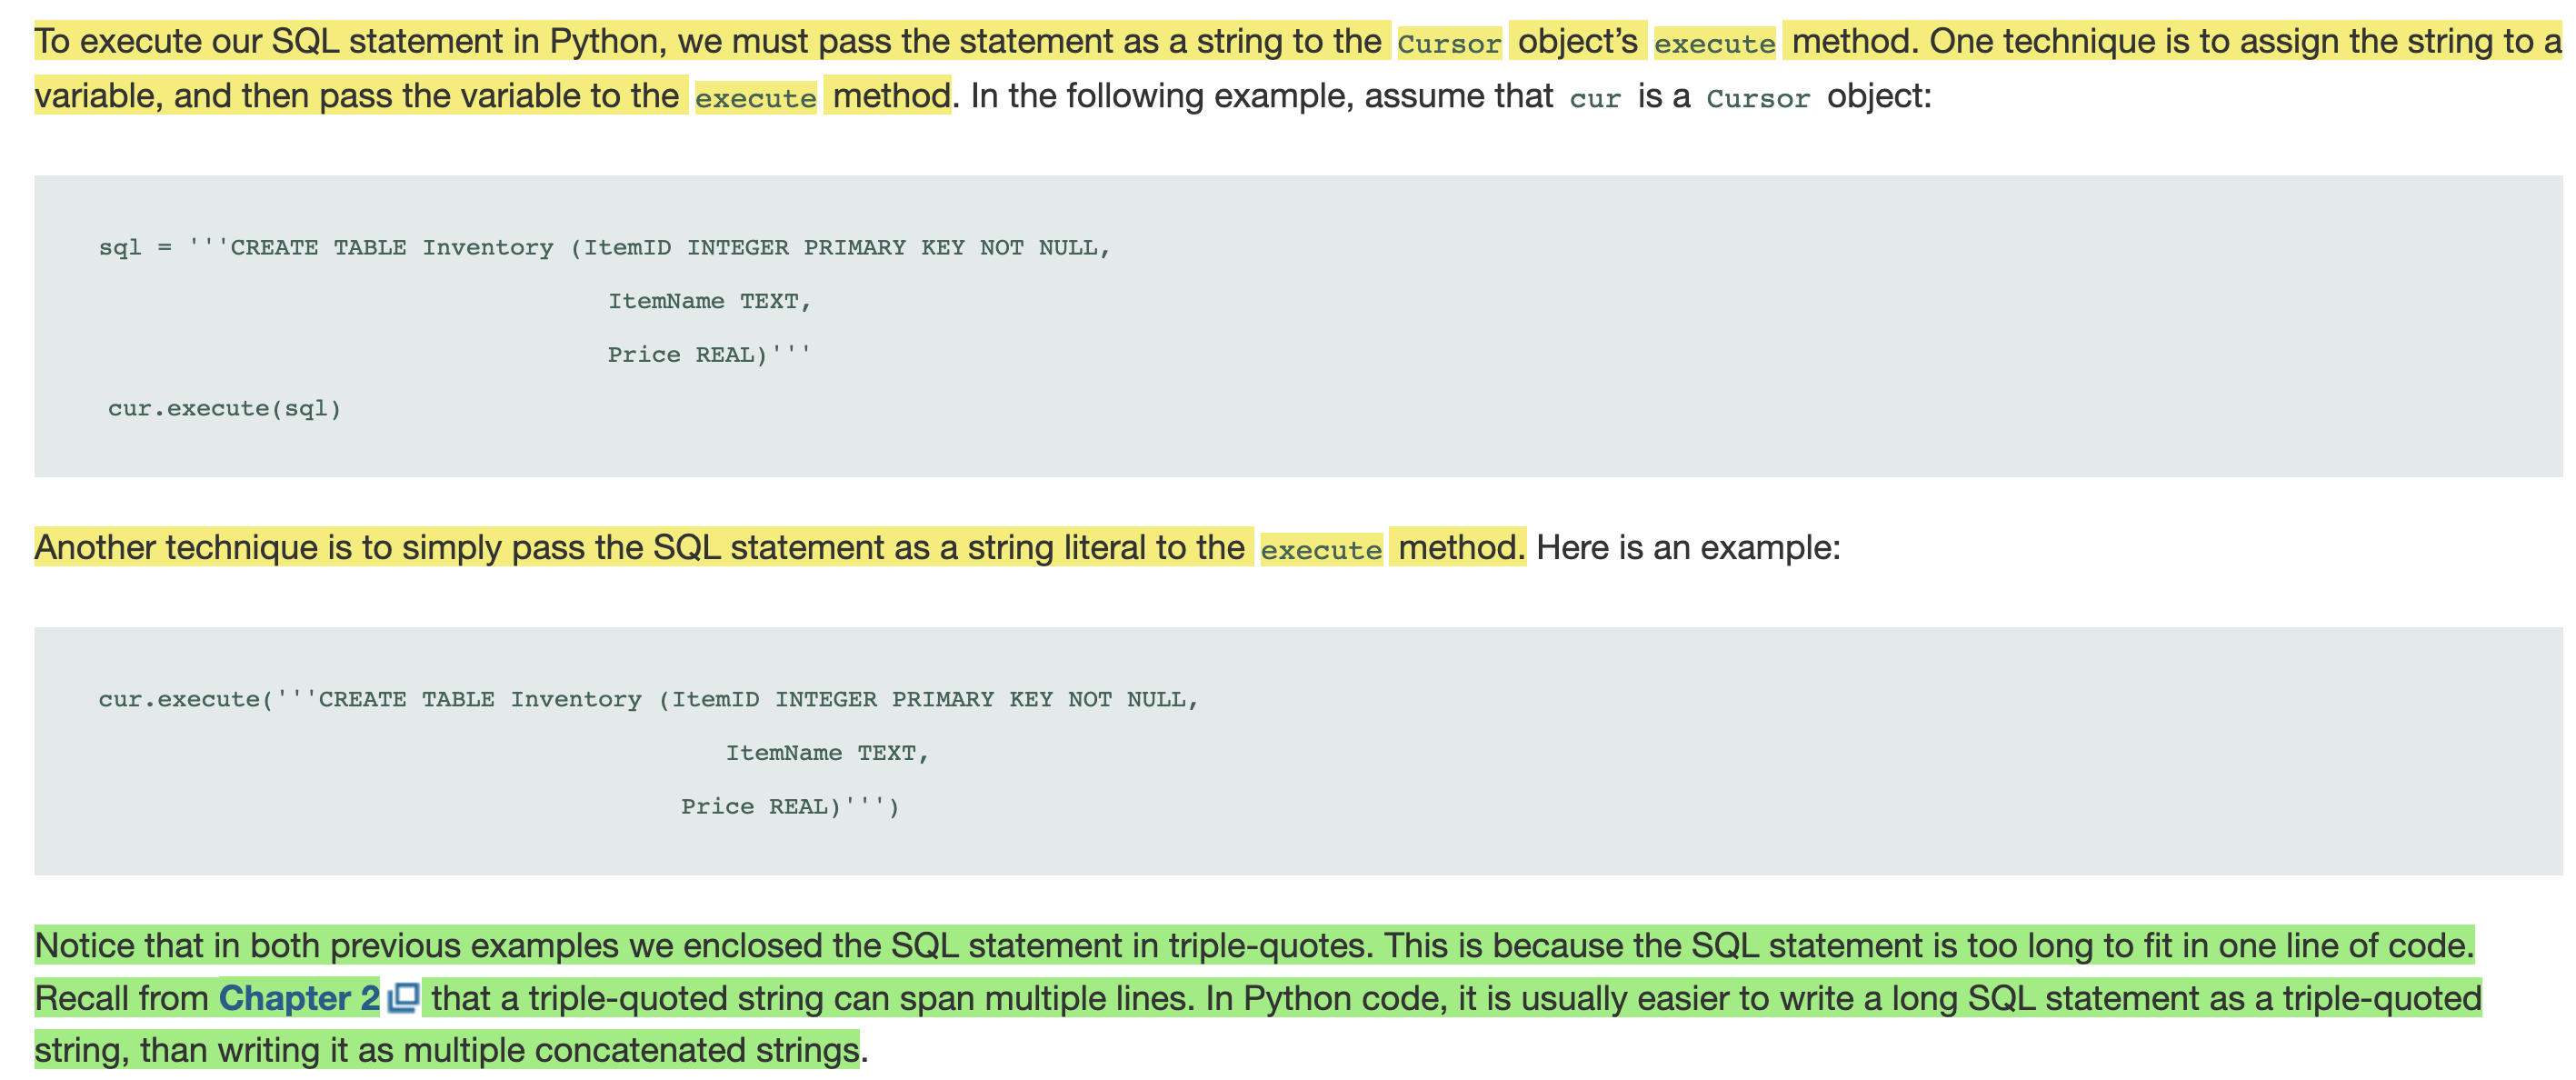

In [3]:
import sqlite3

def main():
    # Connect to the database.
    conn = sqlite3.connect('inventory.db')
   
    # Get a cursor.
    cur = conn.cursor()
  
    # Add the Inventory table.
    cur.execute('''CREATE TABLE Inventory (ItemID INTEGER PRIMARY KEY NOT NULL, 
                                                                ItemName TEXT, 
                                                                Price REAL)''')
    # Commit the changes.
    conn.commit()
   
    # Close the connection.
    conn.close()
 
    # Execute the main function.
if __name__ == '__main__':
    main()

# Creating Multiple Tables

It’s common for databases to contain multiple tables.

In [4]:
import sqlite3
 
def main():
    # Connect to the database.
    conn = sqlite3.connect('company.db')
    
    # Get a cursor.
    cur = conn.cursor()

    # Add the Customer table.
    cur.execute('''CREATE TABLE Customers (CustomerID INTEGER PRIMARY KEY NOT NULL, 
                                            Name TEXT, 
                                            Email TEXT)''')
  
    # Add the Employee table.
    cur.execute('''CREATE TABLE Employees (EmployeeID INTEGER PRIMARY KEY NOT NULL,
                                            Name TEXT,
                                            Position TEXT)''')
  
    # Commit the changes.
    conn.commit()
   
    # Close the connection.
    conn.close()
# Execute the main function.
if __name__ == '__main__':
    main()

# Creating a Table Only If It Does Not Already Exist

An error will occur if you try to create a table that already exists. To prevent the error, you can use this format of the CREATE TABLE statement

**CREATE TABLE IF NOT EXISTS TableName (ColumnName1 DataType1,ColumnName2 DataType2, etc...)**

When you use the CREATE TABLE statement with the IF NOT EXISTS clause, the specified table will be created only if it does not already exist. If the table already exists, the statement will not attempt to create it and the error will be avoided.

**example ---> CREATE TABLE IF NOT EXISTS Inventory (ItemID INTEGER PRIMARY KEY NOT NULL,ItemName TEXT,Price REAL)

# Deleting a Table

use the SQL statement DROP TABLE

**DROP TABLE TableName**

When you use the DROP TABLE statement with the IF EXISTS clause, the specified table will be deleted only if it exists. If the table does not exist, the statement will not attempt to delete it and the error will be avoided. 

**>>> cur.execute('DROP TABLE IF EXISTS Temp')**


# Adding Data to a Table

**You use the INSERT statement in SQL to insert a new row into a table.**

INSERT INTO TableName (ColumnName1, ColumnName2, etc...)

                        VALUES (Value1, Value2, etc...)
                        
In this general format ColumnName1, ColumnName2, etc...is a list of column names and Value1, Value2, etc...is a list of corresponding values. In the new row, Value1 will appear in the column specified by ColumnName1, Value2 will appear in the column specified by ColumnName2, and so forth.

An actual example might look like this

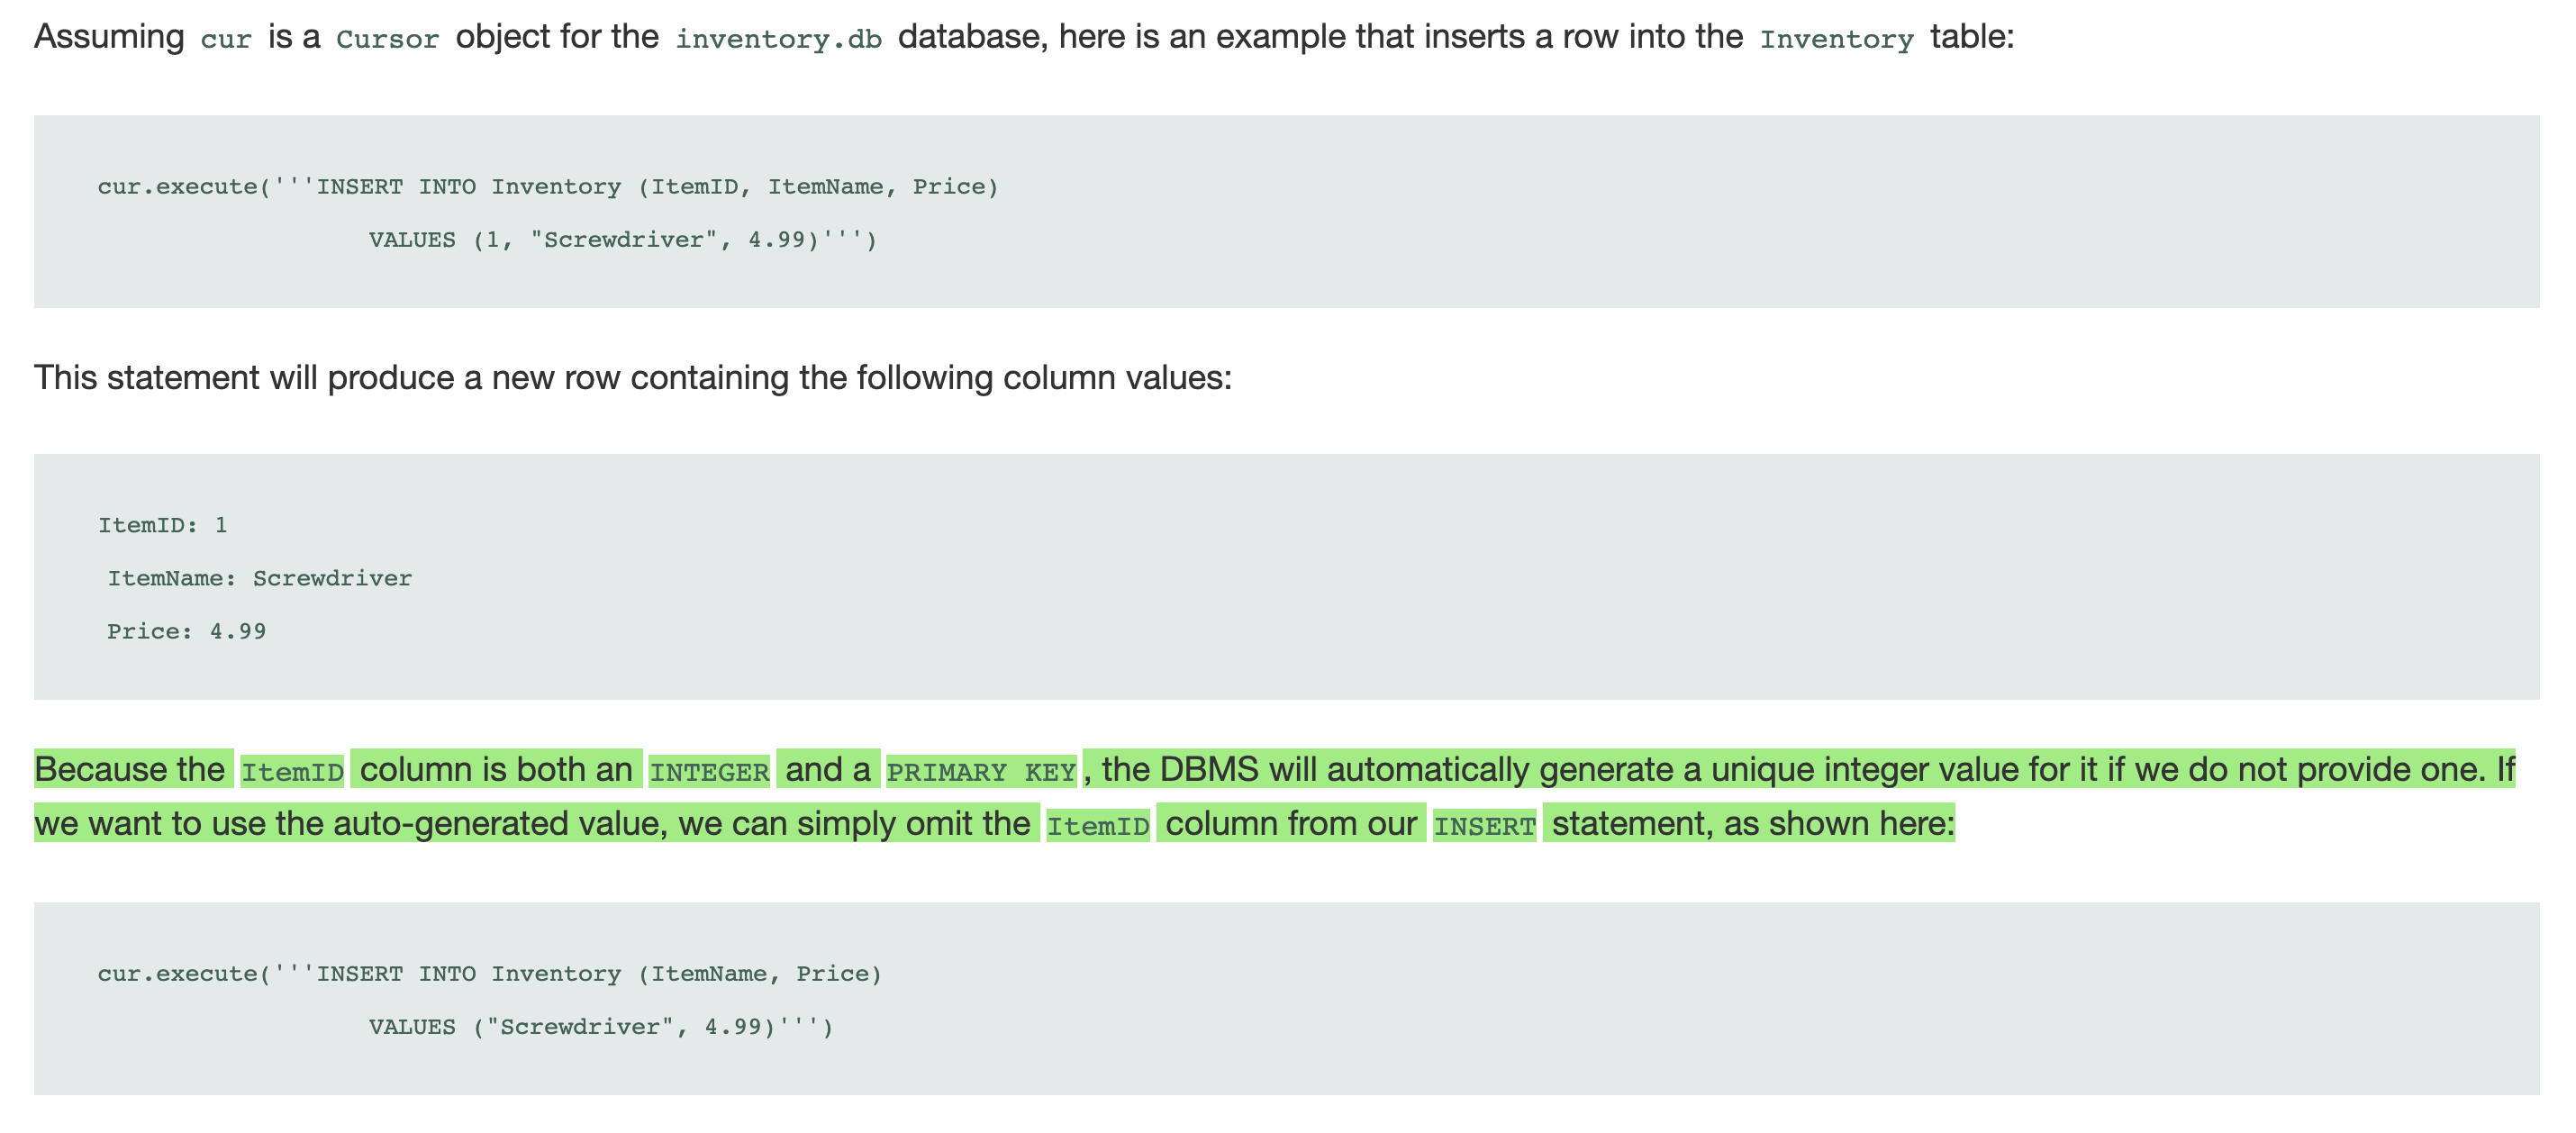

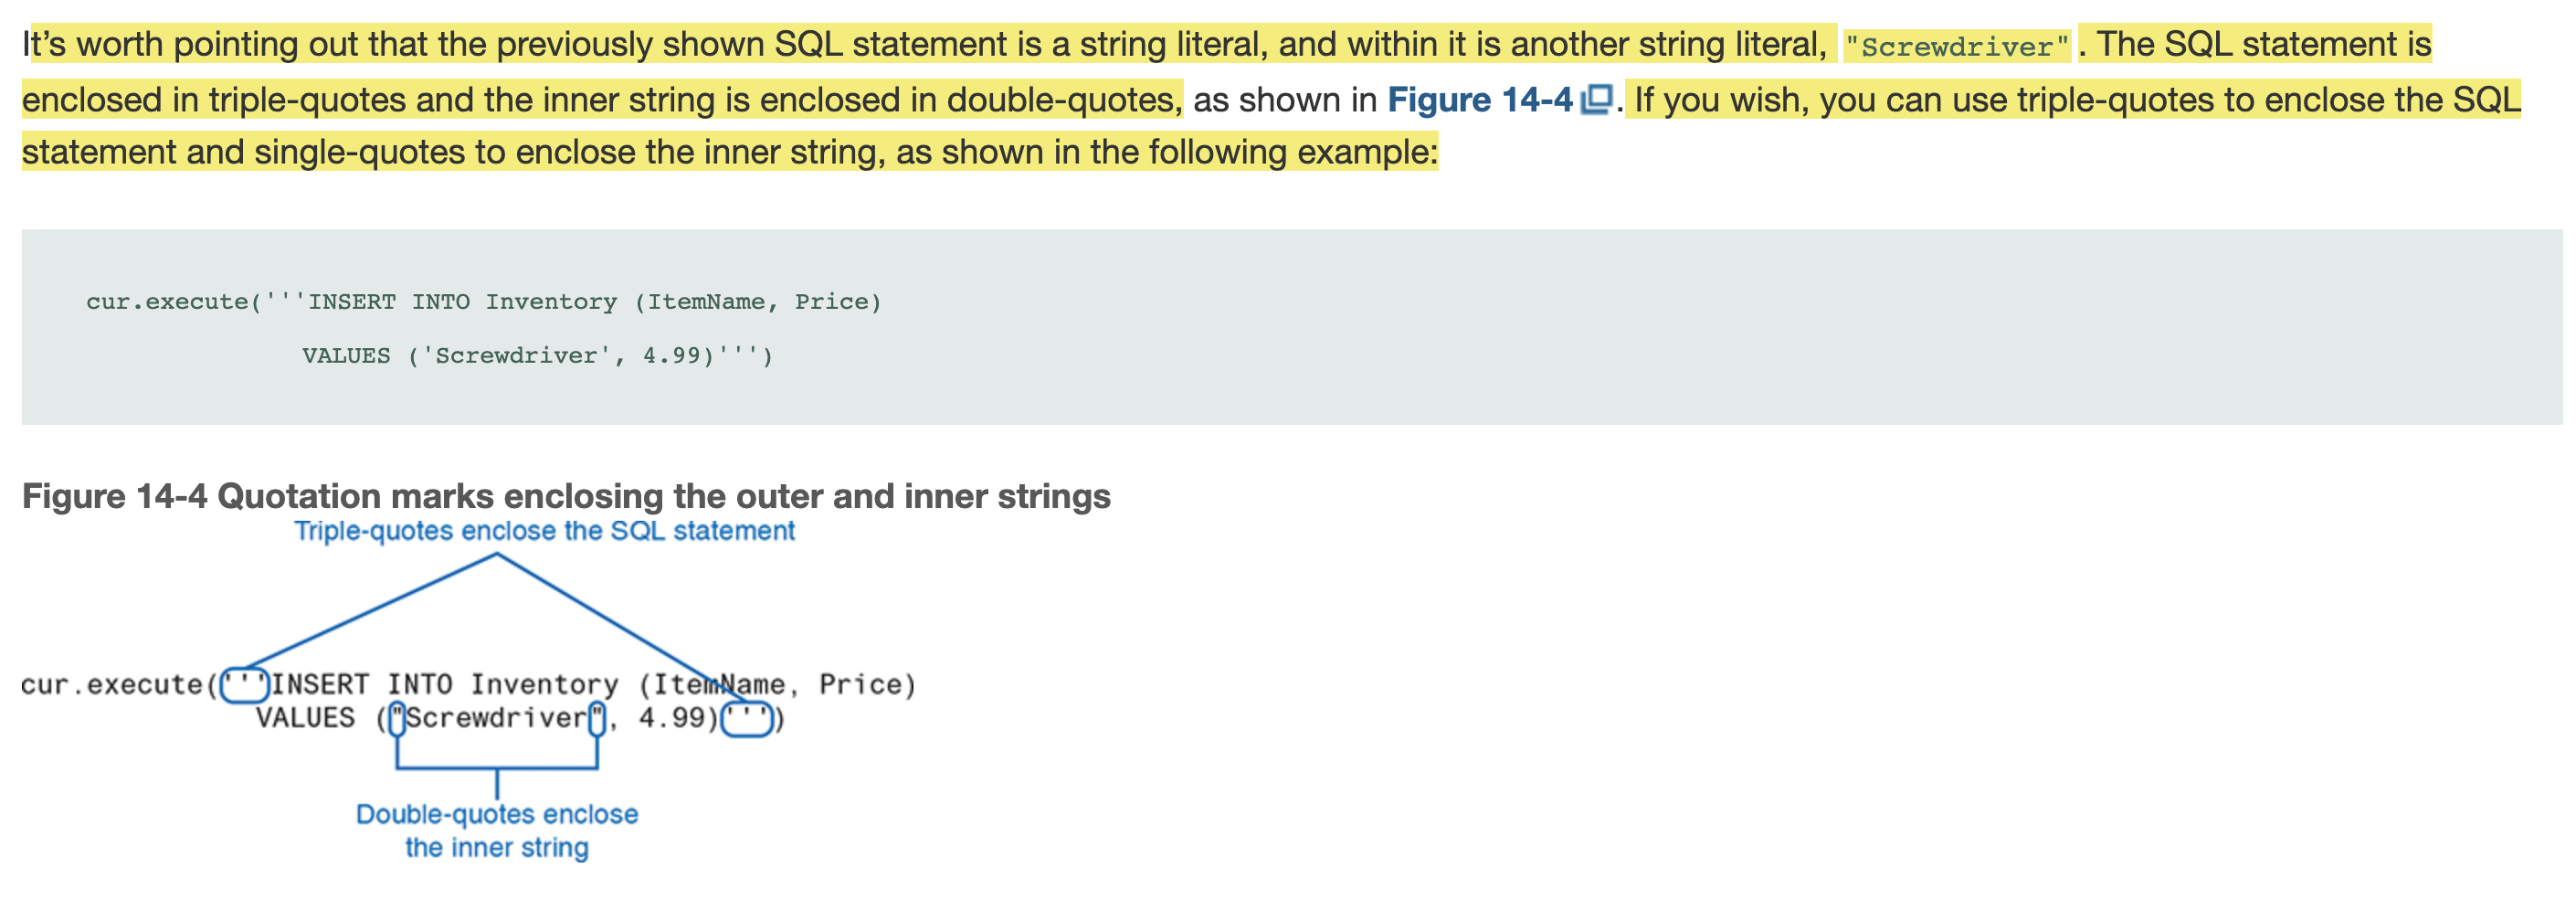

**The important thing to remember is that the quotes that you use on the inner string must be different than the quotes that you use on the outer string**

In [8]:
import sqlite3

def main():
    # Connect to the database.
    conn = sqlite3.connect('inventory.db')
    
    # Get a cursor.
    cur = conn.cursor()
    
    # Add a row to the Inventory table.
    cur.execute('''INSERT INTO Inventory (ItemName, Price)
                    VALUES ("Screwdriver", 4.99)''')
    
    # Add another row to the Inventory table.
    cur.execute('''INSERT INTO Inventory (ItemName, Price)
                    VALUES ("Hammer", 12.99)''')
    
    # Add another row to the Inventory table.
    cur.execute('''INSERT INTO Inventory (ItemName, Price)
                    VALUES ("Vice Grips", 14.99)''')
    
    # Commit the changes.
    conn.commit()
    
    # Close the connection.
    conn.close()
    
# Execute the main function.
if __name__ == '__main__':
    main()

# Inserting Multiple Rows with One INSERT Statement

In [ ]:
cur.execute('''INSERT INTO Inventory (ItemName, Price)
                VALUES ("Screwdriver", 4.99),
                        ("Hammer", 12.99),
                        ("Vice Grips", 14.99)''')

#DO NOT EXECUTE

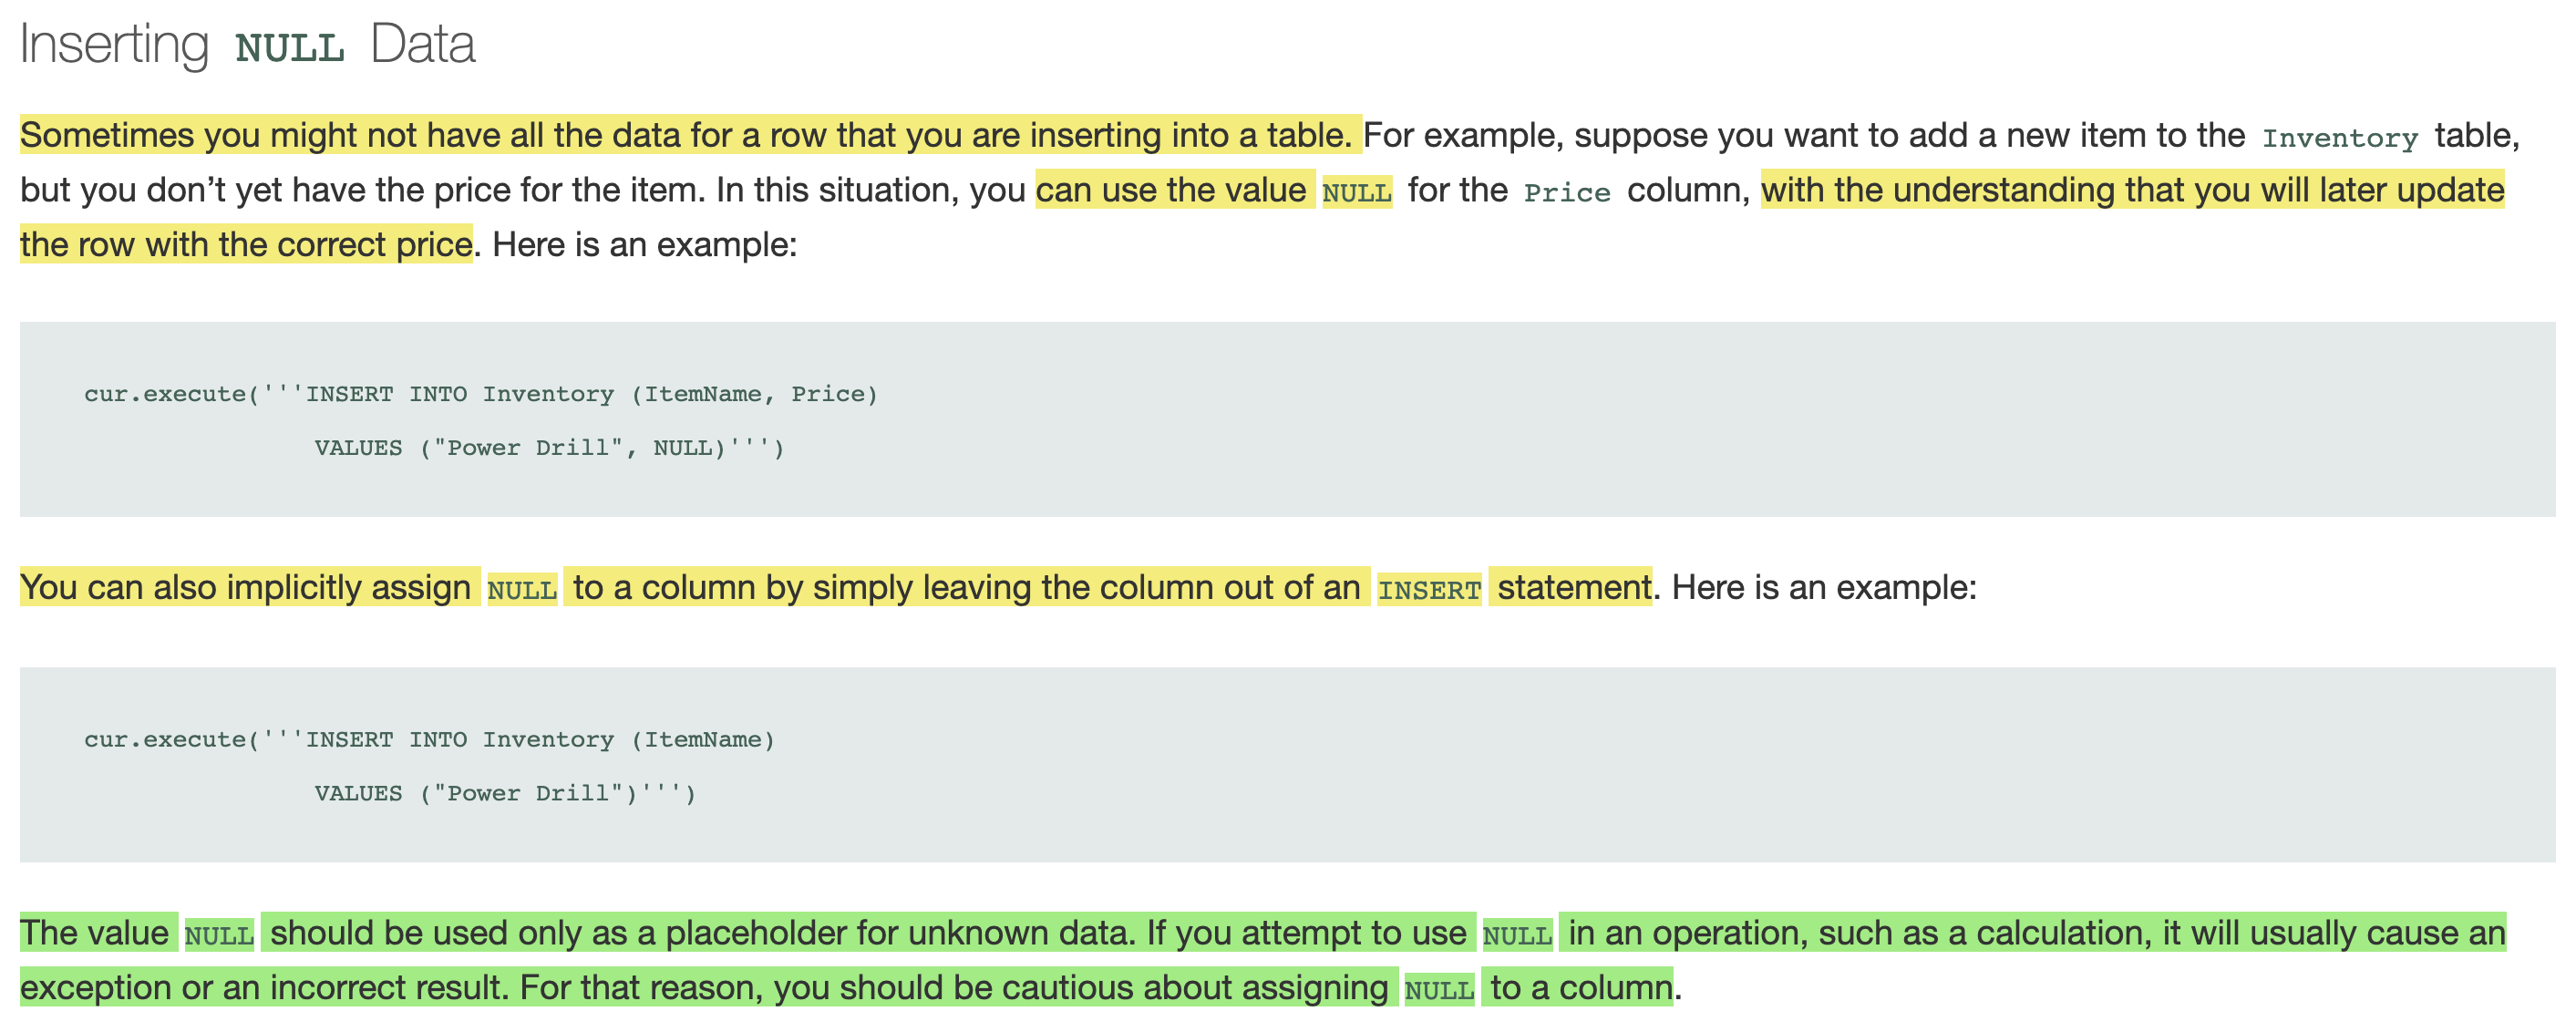

**To prevent a column from ever being assigned the value NULL, use the NOT NULL constraint when you create the table. Here is an example:**

CREATE TABLE Inventory (ItemID INTEGER PRIMARY KEY NOT NULL,
                         ItemName TEXT NOT NULL,
                         Price REAL NOT NULL)

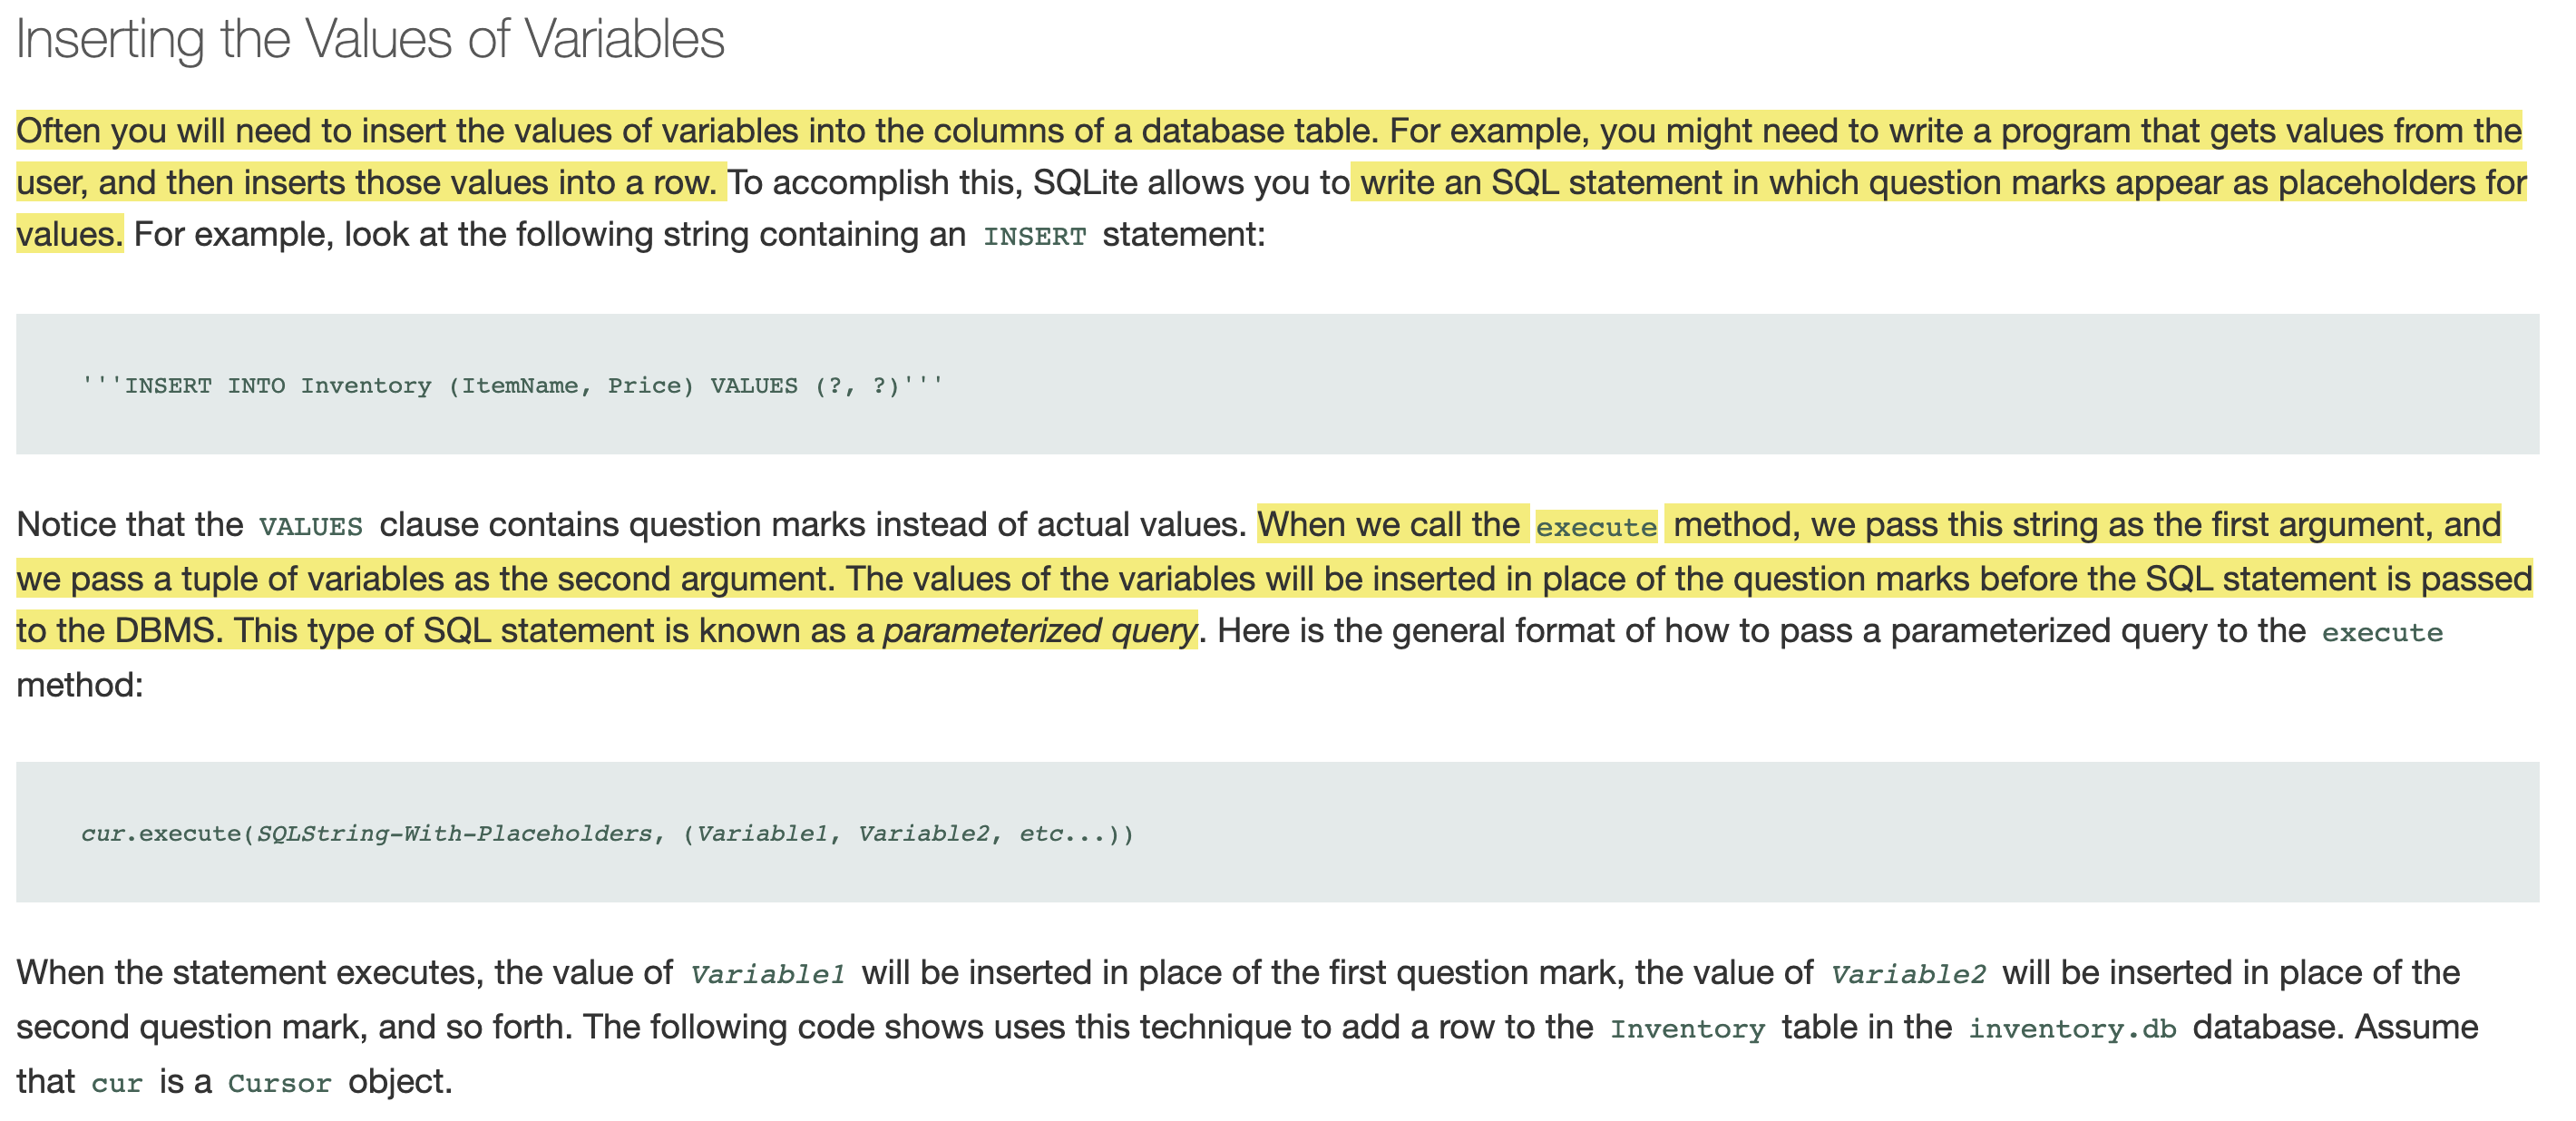

In [ ]:
item_name = 'Wrench'
price = 16.99

cur.execute('''INSERT INTO Inventory (ItemName, Price)
                VALUES (?,?)''', (item_name, price))
            
#DO NOT EXECUTE

In [4]:
import sqlite3

def main():
    
    #loop control variable
    again = 'y'
    
    #connect to inventory database
    conn = sqlite3.connect('inventory.db')
    
    #get the cursor
    cur = conn.cursor()
    
    while again == 'y':
        #get the item name and price
        item_name = input('Item Name: ')
        price = float(input('Price: '))
        
        #add the item to table
        cur.execute('''INSERT INTO Inventory (ItemName, Price)
                        VALUES(?,?)''',(item_name, price))
        
        #add another
        again = input('add another item? (y/n): ')
        
    #commit the changes
    conn.commit()
    
    #close the connection
    conn.close
    
#execute the main function

if __name__ == '__main__':
    main()
    

Item Name: Saw
Price: 24.99
add another item? (y/n): y
Item Name: Drill
Price: 89.99
add another item? (y/n): y
Item Name: Tape Measure
Price: 8.99
add another item? (y/n): n


**The Python value None and the SQLite value NULL are equivalent. If a variable is set to None and you insert that variable’s value into a column, the column will be assigned NULL. For that reason, be cautious that you don’t accidentally assign NULL to a column when inserting the value of a variable into an INSERT statement.**

# IMPORTANT INFO BELOW

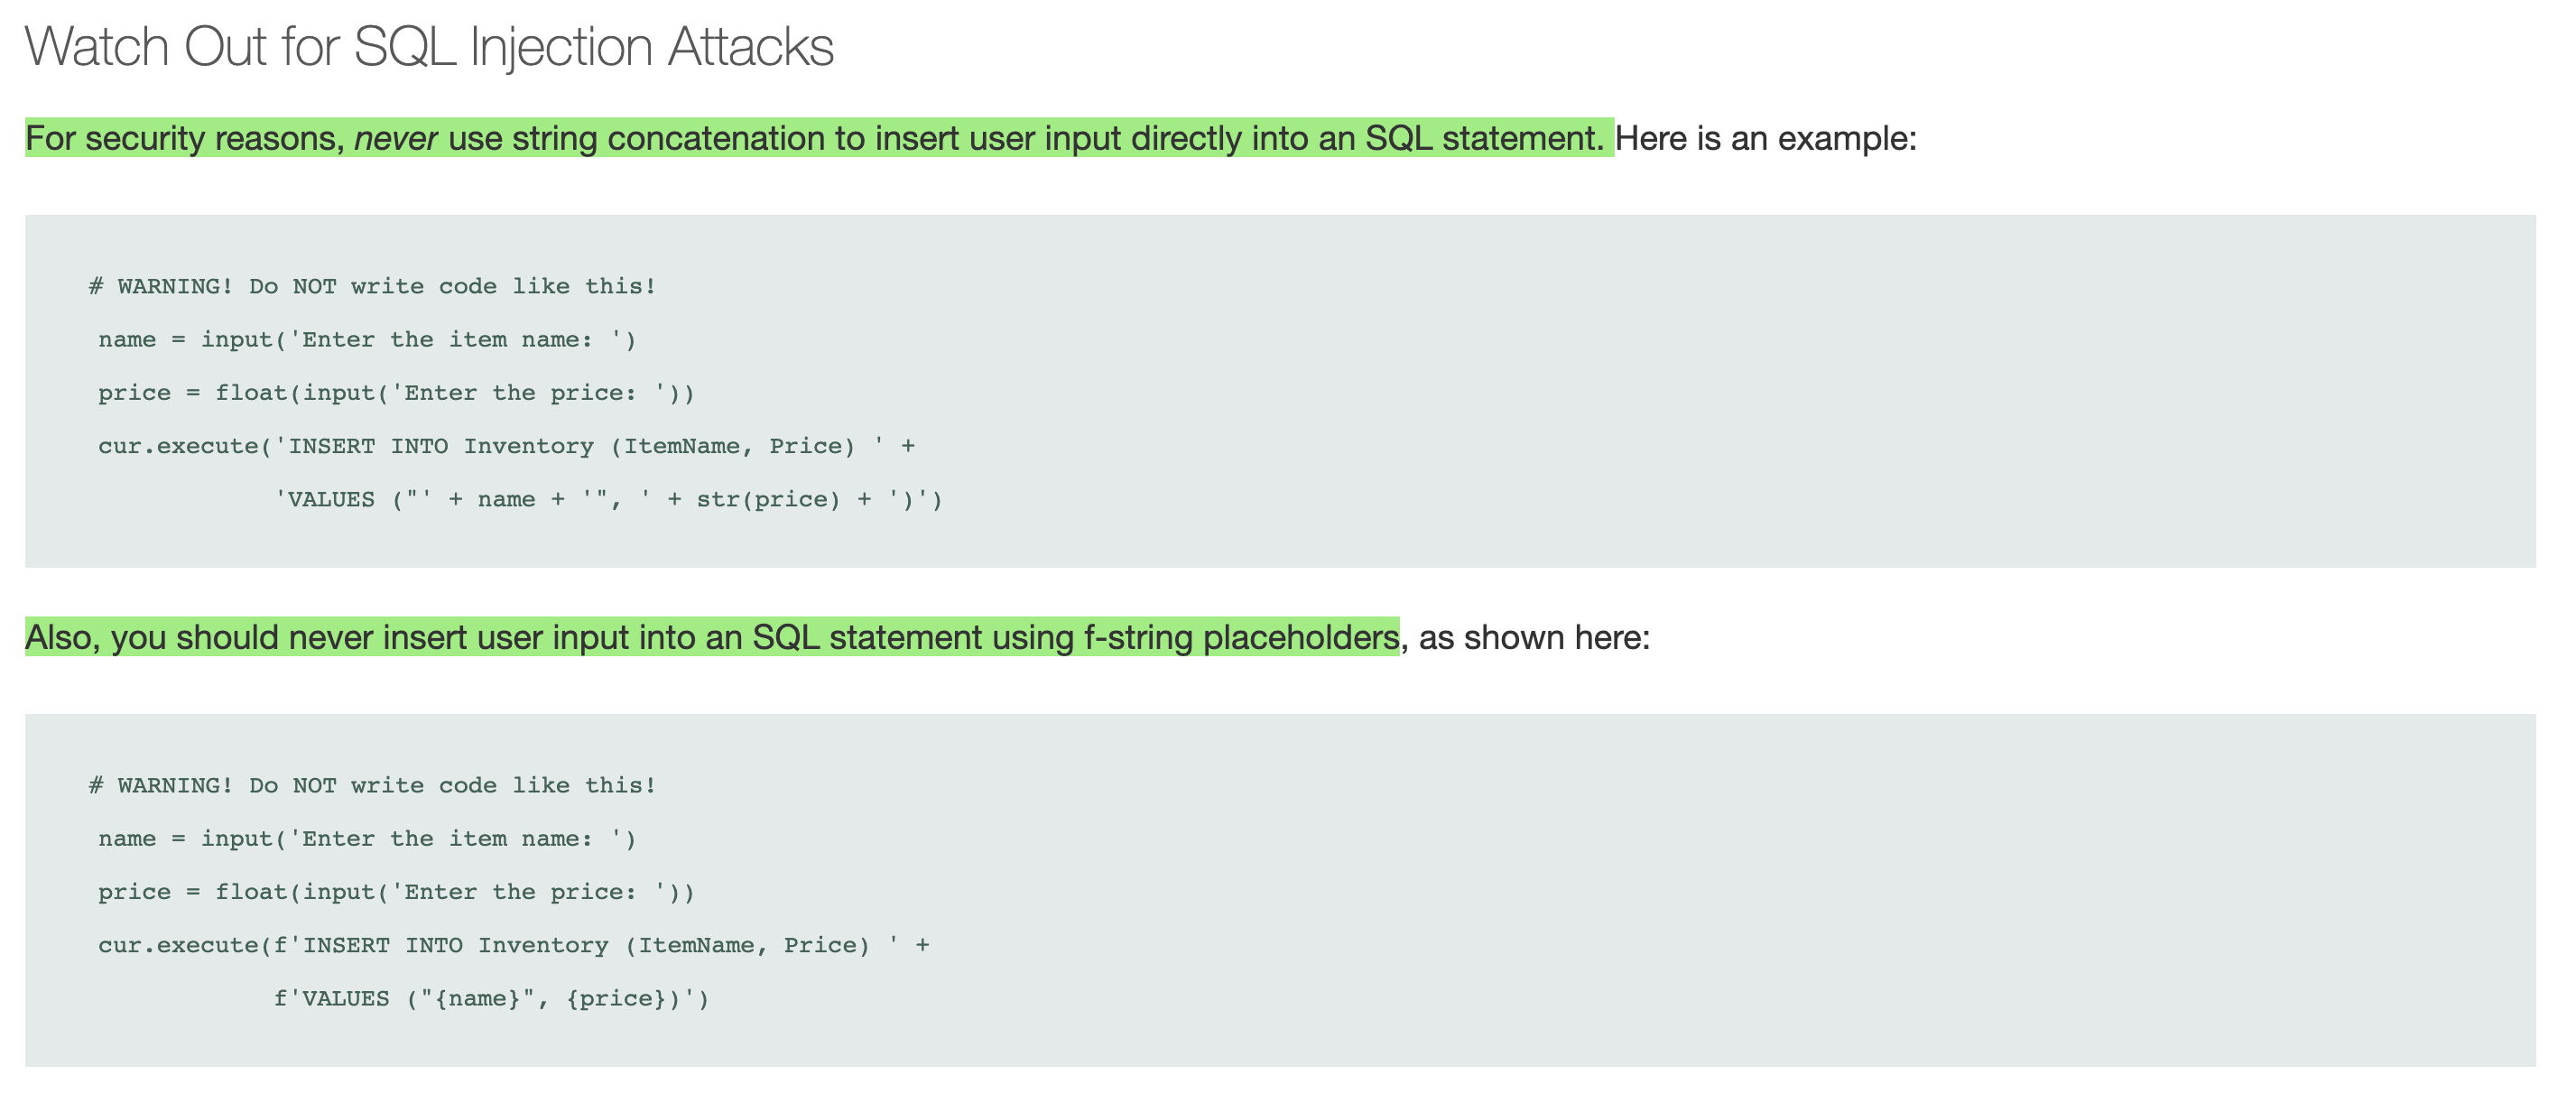

**These practices make your program vulnerable to a type of attack known as SQL injection.There are other techniques for preventing SQL injection as well. For example, before inserting user input into an SQL statement, the program can examine the input to make sure it does not contain any operators or other characters that might indicate the user has entered SQL code. If the input looks suspicious, it is rejected. When you are writing code in a production environment you always want to make sure your programs are secure. SQL injection is one of the most common ways that hackers compromise websites, so be sure to study the topic in more depth at a later time**


In [1]:
#practice problem 1

import sqlite3

def main():
    #coonect to db
    conn = sqlite3.connect('inventory.db')
    
    #get the cursor to manipulate data
    cur = conn.cursor()
    
    #put the variables 
    ItemName = 'Table Saw'
    ItemPrice = 199.99
    
    #lets add these variables 
    conn.execute('''INSERT INTO Inventory (ItemName, Price)
                    VALUES(?,?)''', (ItemName, ItemPrice))
    
    #commit to the changes
    conn.commit()
    
    #close the connection
    conn.close
    
#execute the main function
if __name__ == '__main__':
    main()

# Querying Data with the SQL SELECT Statement

**The SELECT statement is used in SQL to retrieve data from a database.**

Format ---> **SELECT Column FROM Table**

if you need more than one column ---> **SELECT Column, Column FROM Table**

In Python, using the SELECT statement with SQLite is a two-step process:
- Execute the SELECT statement—First, you pass the SELECT statement as a string to the Cursor object’s execute method. The DBMS retrieves the results of the SELECT statement, but it does not return those results to your program.

- Fetch the Results—After executing the SELECT statement, call either the fetchall method or the fetchone method to fetch the results. (Both fetchall and fetchone are Cursor object methods.)

The Cursor object’s fetchall method returns the results of the SELECT statement as a list of tuples.

In [7]:
conn = sqlite3.connect('chocolate.db')

#get cursor
cur = conn.cursor()

#execute SQL statement
cur.execute('SELECT Description, RetailPrice FROM Products')
cur.fetchall()

[('Dark Chocolate Bar', 5.99),
 ('Medium Dark Chocolate Bar', 5.99),
 ('Milk Chocolate Bar', 5.99),
 ('Chocolate Truffles', 11.99),
 ('Chocolate Caramel Bar', 6.99),
 ('Chocolate Raspberry Bar', 6.99),
 ('Chocolate and Cashew Bar', 9.99),
 ('Hot Chocolate Mix', 12.99),
 ('Semisweet Chocolate Chips', 3.99),
 ('White Chocolate Chips', 3.99)]

Notice that when we call the fetchall method in line 6, the method returns all the results of the SELECT statement as a list of tuples. Each element of the list is a tuple, and each tuple has two elements: a description and a retail price. If you want a **loop** do this

In [20]:
import sqlite3 

def main():
    #connect to db
    conn = sqlite3.connect('chocolate.db')
    
    #get cursor
    cur = conn.cursor()
    
    #get product description and retail price
    cur.execute('SELECT Description, RetailPrice FROM Products')
    
    #Fetch the results of the SELECT statement.
    results = cur.fetchall()
    
    # Iterate over the rows and display the results.
    for row in results:
        print(f'{row[0]:30} {row[1]:5}')
        
    #close connection
    cur.close()
        
#execute the main function
if __name__ == '__main__':
    main()
        
                                     

Dark Chocolate Bar              5.99
Medium Dark Chocolate Bar       5.99
Milk Chocolate Bar              5.99
Chocolate Truffles             11.99
Chocolate Caramel Bar           6.99
Chocolate Raspberry Bar         6.99
Chocolate and Cashew Bar        9.99
Hot Chocolate Mix              12.99
Semisweet Chocolate Chips       3.99
White Chocolate Chips           3.99


In [21]:
#fetchone method 

conn = sqlite3.connect('chocolate.db')
    
#get cursor
cur = conn.cursor()
    
#get product description and retail price
cur.execute('SELECT Description, RetailPrice FROM Products')

#fetchone
cur.fetchone()
    
    

('Dark Chocolate Bar', 5.99)

In [24]:
#fetchone loop as previous example 

def main():
    #connect to db
    conn = sqlite3.connect('chocolate.db')
    
    #get cursor
    cur = conn.cursor()
    
    #get product description and retail price
    cur.execute('SELECT Description, RetailPrice FROM Products')
    
    #Fetch the results of the SELECT statement.
    row = cur.fetchone()
    
    # Iterate over the rows and display the results.
    while row != None:
        #display row
        print(f'{row[0]:30} {row[1]:5}')
        
        #fetch next row
        row = cur.fetchone()
        
    #close connection
    cur.close()
        
#execute the main function
if __name__ == '__main__':
    main()
        

Dark Chocolate Bar              5.99
Medium Dark Chocolate Bar       5.99
Milk Chocolate Bar              5.99
Chocolate Truffles             11.99
Chocolate Caramel Bar           6.99
Chocolate Raspberry Bar         6.99
Chocolate and Cashew Bar        9.99
Hot Chocolate Mix              12.99
Semisweet Chocolate Chips       3.99
White Chocolate Chips           3.99


# Selecting All the Columns in a Table

**SELECT * FROM Products**

In [27]:
    #connect to db
    conn = sqlite3.connect('chocolate.db')
    
    #get cursor
    cur = conn.cursor()
    
    #select all columns
    cur.execute('SELECT * FROM Products')
    
    #fetch results
    cur.fetchall()

[(1, 'Dark Chocolate Bar', 2.99, 5.99, 197),
 (2, 'Medium Dark Chocolate Bar', 2.99, 5.99, 406),
 (3, 'Milk Chocolate Bar', 2.99, 5.99, 266),
 (4, 'Chocolate Truffles', 5.99, 11.99, 398),
 (5, 'Chocolate Caramel Bar', 3.99, 6.99, 272),
 (6, 'Chocolate Raspberry Bar', 3.99, 6.99, 363),
 (7, 'Chocolate and Cashew Bar', 4.99, 9.99, 325),
 (8, 'Hot Chocolate Mix', 5.99, 12.99, 222),
 (9, 'Semisweet Chocolate Chips', 1.99, 3.99, 163),
 (10, 'White Chocolate Chips', 1.99, 3.99, 293)]

In [29]:
# print the results of the SELECT statement in an easier-to-read format.

def main():
    #connect to db
    conn = sqlite3.connect('chocolate.db')
    
    #get cursor
    cur = conn.cursor()
    
    #selects all statements from table
    cur.execute('SELECT * FROM Products')
    
    # Fetch the results of the SELECT statement.
    results = cur.fetchall()
    
    #display results
    for row in results:
        print(f'{row[0]:2} {row[1]:30} {row[2]:5} {row[3]:5} {row[4]:5}')
    
    #close connection
    conn.close()   
    
#execute the main function
if __name__ == '__main__':
    main()
        

 1 Dark Chocolate Bar              2.99  5.99   197
 2 Medium Dark Chocolate Bar       2.99  5.99   406
 3 Milk Chocolate Bar              2.99  5.99   266
 4 Chocolate Truffles              5.99 11.99   398
 5 Chocolate Caramel Bar           3.99  6.99   272
 6 Chocolate Raspberry Bar         3.99  6.99   363
 7 Chocolate and Cashew Bar        4.99  9.99   325
 8 Hot Chocolate Mix               5.99 12.99   222
 9 Semisweet Chocolate Chips       1.99  3.99   163
10 White Chocolate Chips           1.99  3.99   293


# Specifying Search Criteria with the WHERE Clause

The WHERE clause can be used with the SELECT statement to specify search criteria. When you use the WHERE clause, only the rows that meet the search criteria will be returned in the result set. 

Format ---> **SELECT Columns FROM Table WHERE Criteria**

example ---> **SELECT * FROM Products WHERE RetailPrice > 10.00**

**The first part of the statement, SELECT * FROM Products, specifies that we want to see every column. The WHERE clause specifies that we want only the rows in which the content of the RetailPrice column is greater than 10.00**

In [30]:
    #connect to db
    conn = sqlite3.connect('chocolate.db')
    
    #get cursor
    cur = conn.cursor()
    
    #selects all statements from table
    cur.execute('SELECT * FROM Products WHERE RetailPrice > 10.00 ')
    
    #get results
    cur.fetchall()

[(4, 'Chocolate Truffles', 5.99, 11.99, 398),
 (8, 'Hot Chocolate Mix', 5.99, 12.99, 222)]

In [32]:
#example shows how we can retrieve only the Description column for all the 
#products that have a retail price greater than 10.00

cur.execute('SELECT Description FROM Products WHERE RetailPrice > 10.00')
cur.fetchall()

[('Chocolate Truffles',), ('Hot Chocolate Mix',)]

**SQLite supports the relational operators**

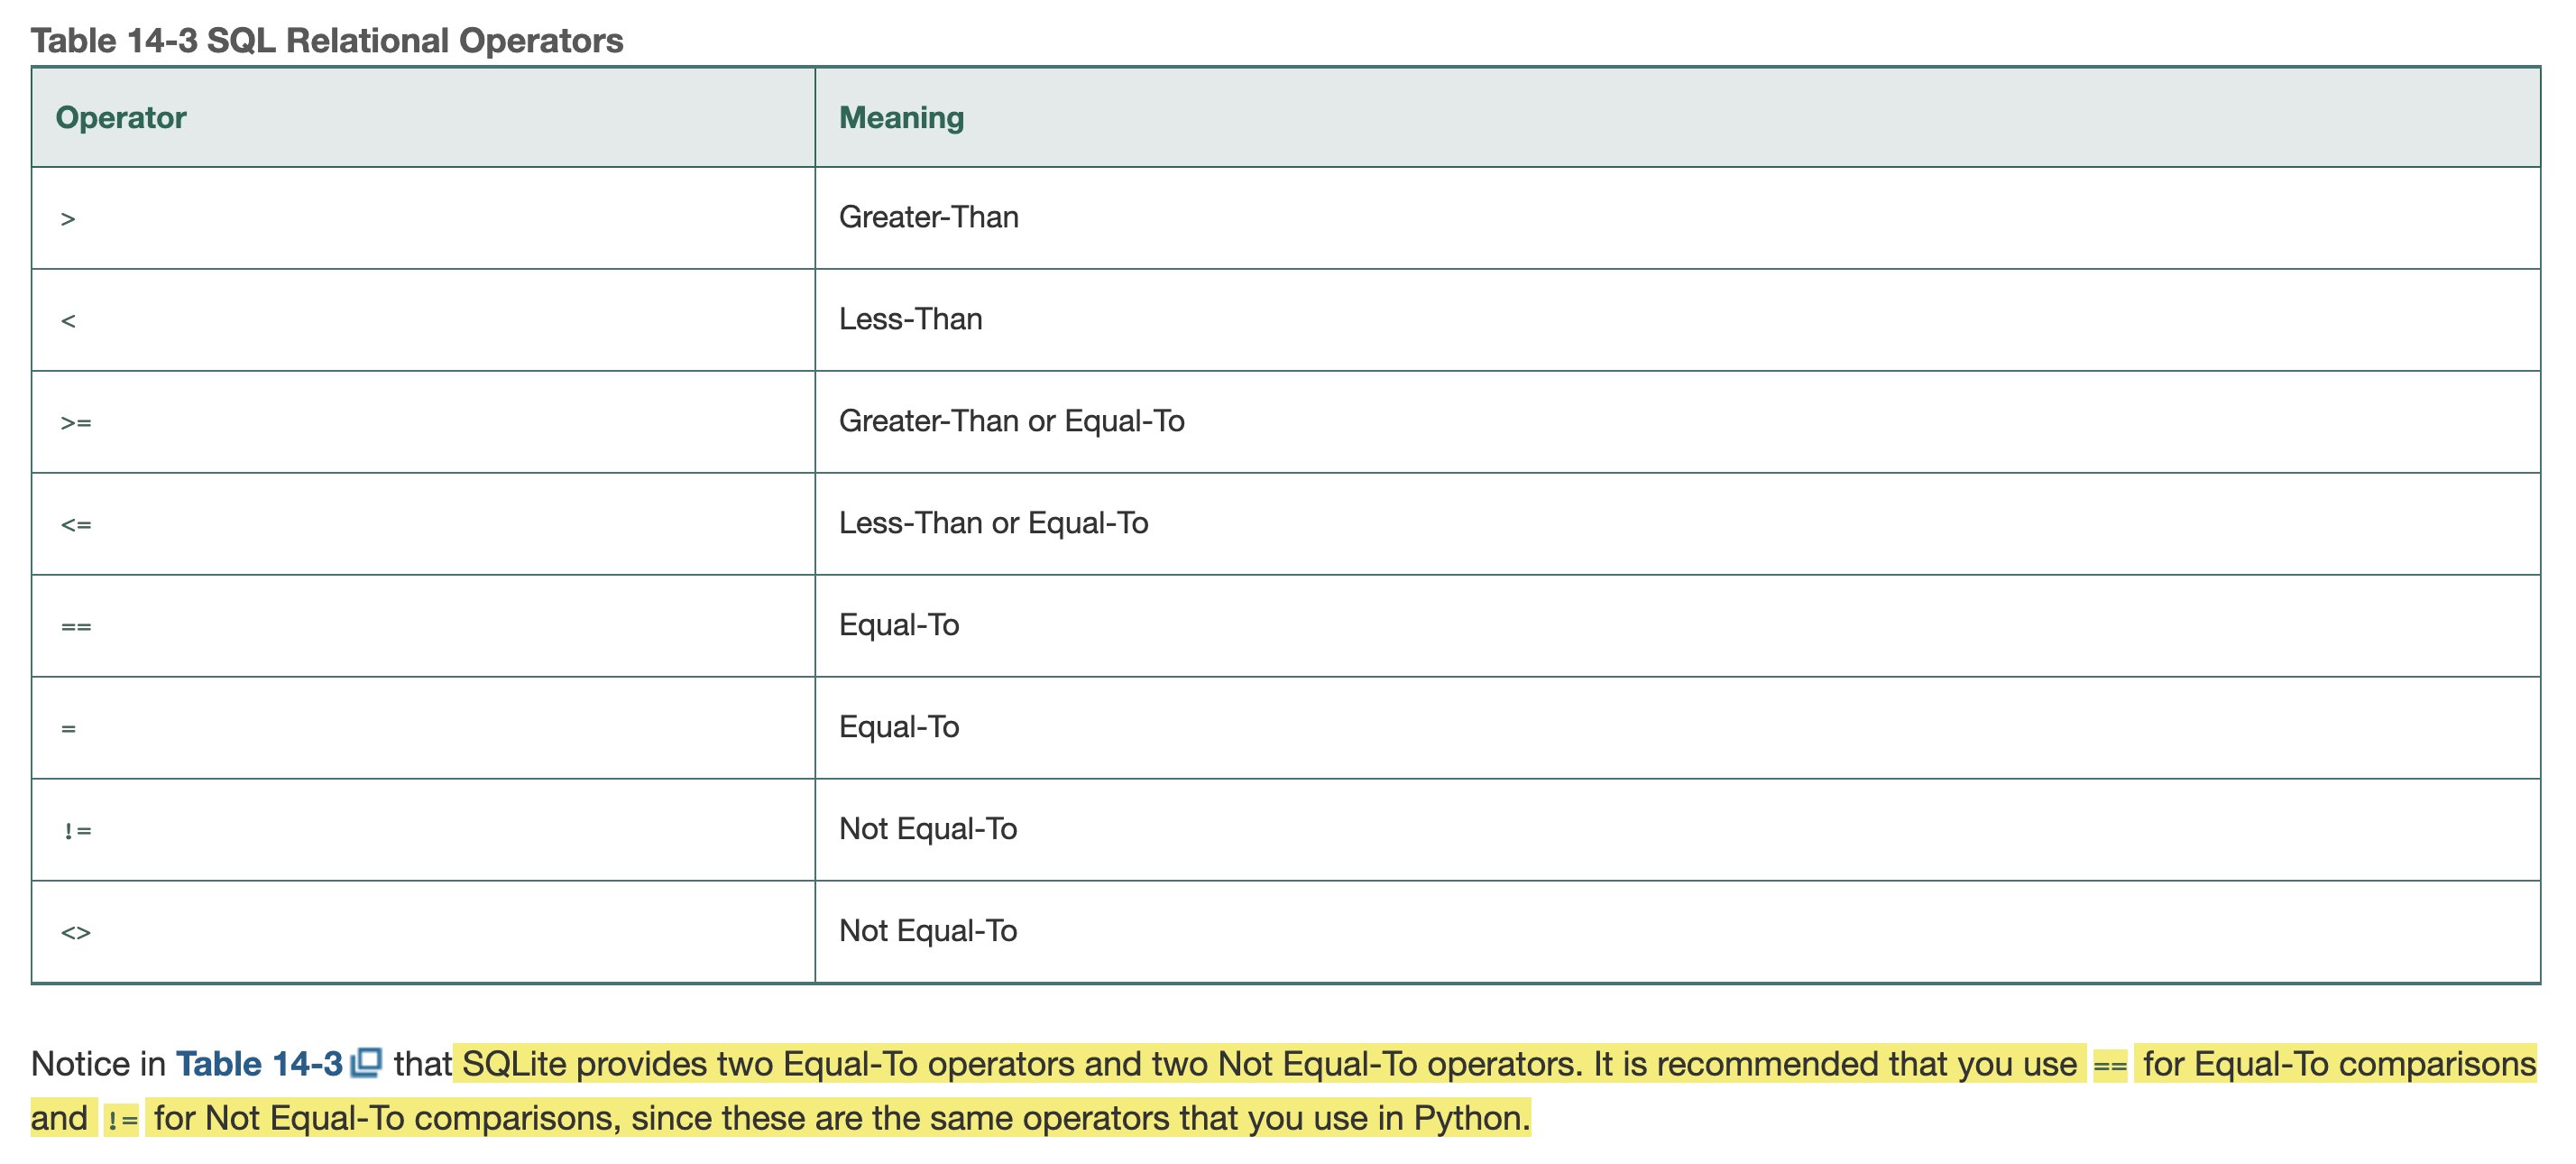

Program 14-9 lets the user enter a minimum price, and then searches the Products table for rows where the RetailPrice column is greater than or equal to the specified price.

In [5]:
import sqlite3 

def main():
    #connect to db
    conn = sqlite3.connect('chocolate.db')
    
    #get cursor
    cur = conn.cursor()
    
    #Get the minimum price from the user.
    min_price = float(input('Enter the minimum price: '))
    
    # Send the SELECT statement to the DBMS.
    cur.execute('''SELECT Description, RetailPrice FROM Products 
                    WHERE RetailPrice >= ?''', 
                                    (min_price,))
    
    #fetch the results
    results = cur.fetchall()
    
    if len(results) >0:
        #show results
        print('Here are the results:')
        print()
        print('Description                    Price')
        print('------------------------------------')
        for row in results:
            print(f'{row[0]:30} {row[1]:>5}')

    else:
        print('No products found.')

    #close connection
    conn.close()
        
#execute the main function
if __name__ == '__main__':
    main()


Enter the minimum price: 5.99
Here are the results:

Description                    Price
------------------------------------
Dark Chocolate Bar              5.99
Medium Dark Chocolate Bar       5.99
Milk Chocolate Bar              5.99
Chocolate Truffles             11.99
Chocolate Caramel Bar           6.99
Chocolate Raspberry Bar         6.99
Chocolate and Cashew Bar        9.99
Hot Chocolate Mix              12.99


**IMPORTANT IMPORTANT. ---> When executing the SQL query, you need to pass a tuple as the second argument, even if there is only one parameter. So, instead of (min_price), it should be (min_price,).**

# SQL Logical Operators: AND, OR, and NOT

**You can use the AND and OR logical operators to specify multiple search criteria in a WHERE clause**

**example** ---> SELECT * FROM Product

                WHERE UnitCost > 3.00 AND UnitsOnHand < 100
                
                
The NOT operator reverses the truth of its operand. If it is applied to an expression that is true, the operator returns false. If it is applied to an expression that is false, the operator returns true. This statement searches for rows where the RetailPrice column is not greater than 5.00.

SELECT * FROM Products

    WHERE NOT RetailPrice > 5.00
    
This statement searches for rows where the RetailPrice column is not greater than 5.00 and not less than 10.00

SELECT * FROM Products

    WHERE NOT(RetailPrice > 5.00 AND RetailPrice < 10.00)


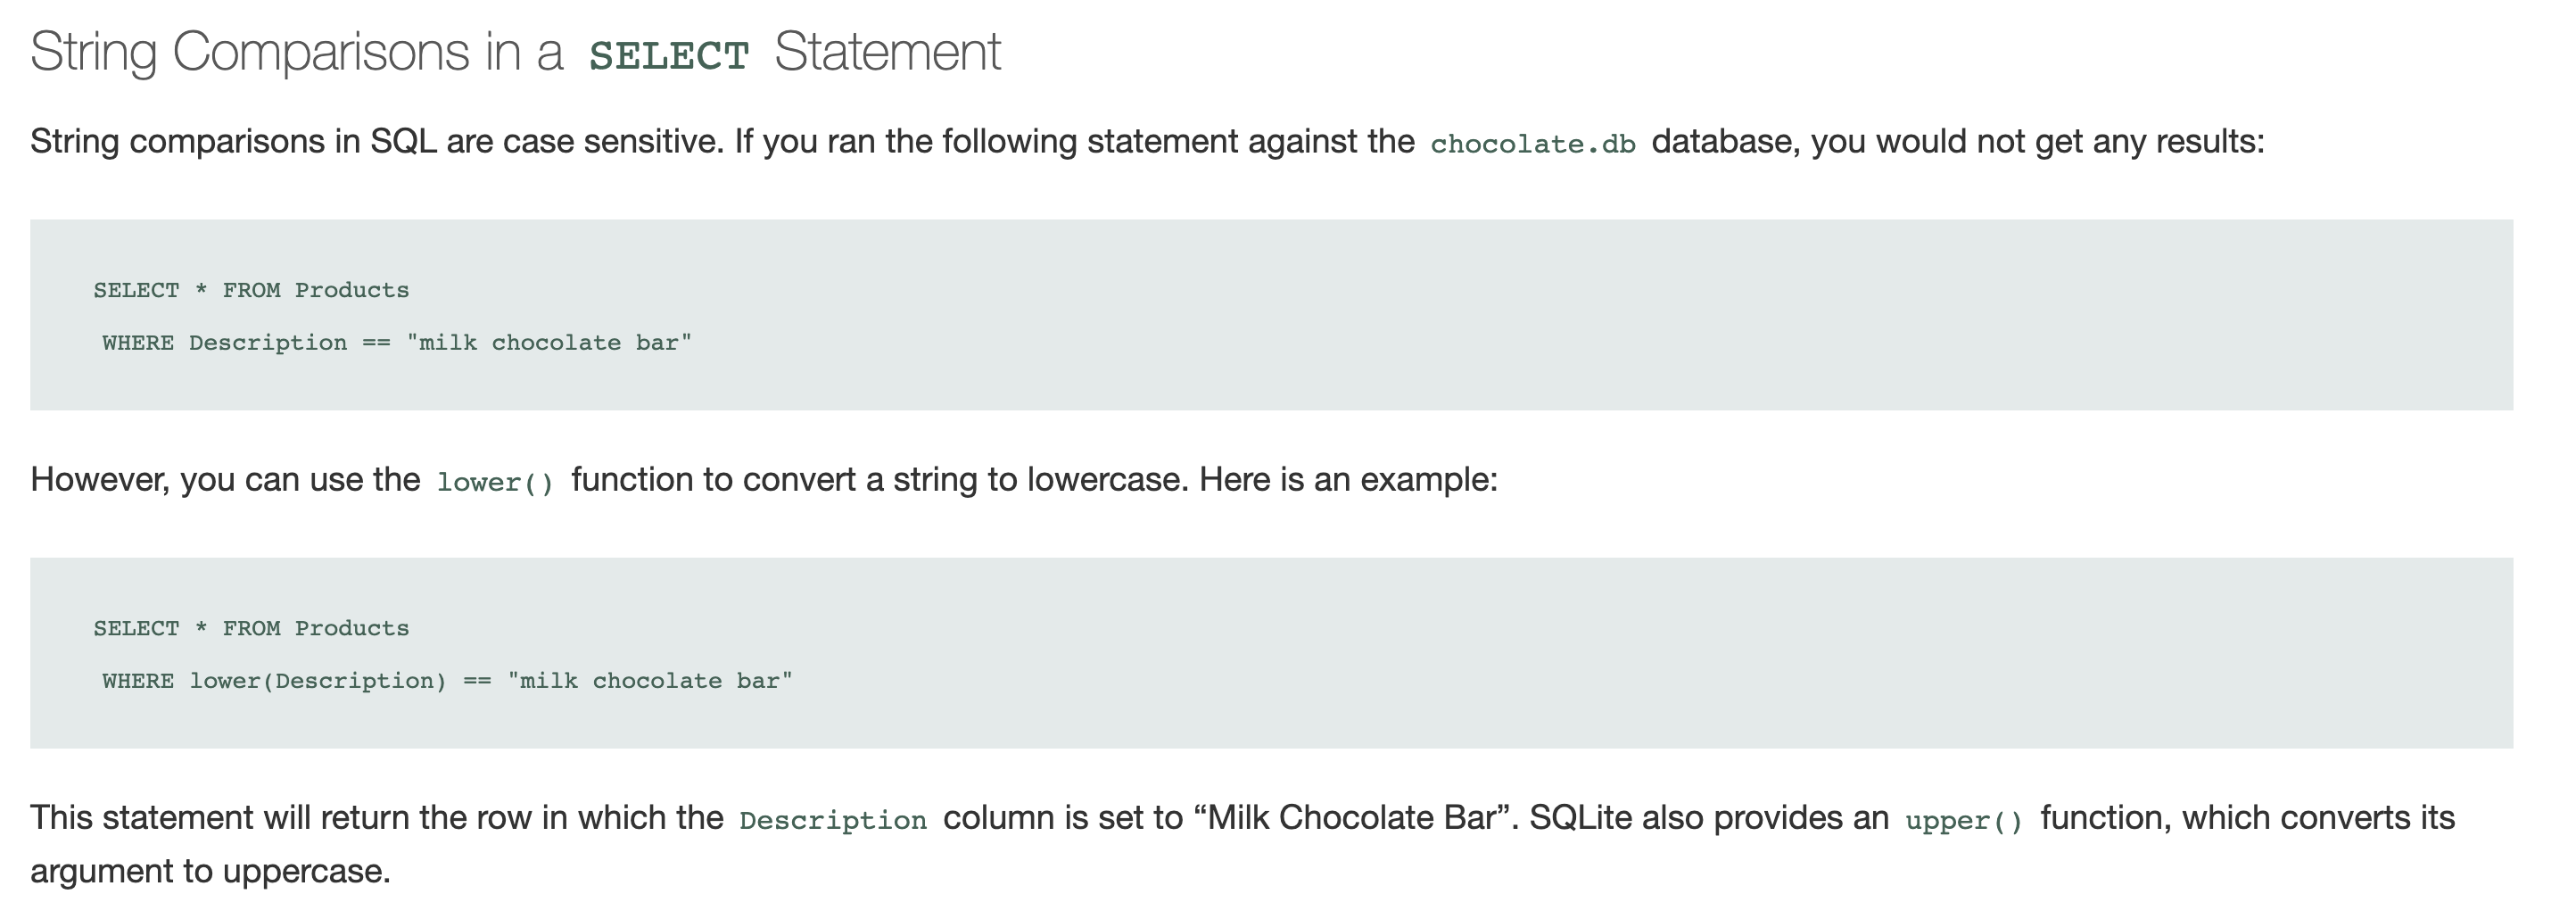

# Using the LIKE Operator

Sometimes searching for an exact string will not yield the results you want. 
Ex: ---> SELECT * FROM Products WHERE Description == "Bar"

- this statement is trying to find all rows in the Description column that has the word "Bar". However it does not WORK like this!

This statement will search for rows where the Description column is equal to the string “Bar”. Unfortunately, it will find none. If you glance back at Table 14-1, you will see that none of the rows in the Products table have a Description column that is equal to “Bar”. However, there are several rows in which the word “Bar” does appear in the Description column. For example, in one row you will find “Dark Chocolate Bar”. In another row you will find “Milk Chocolate Bar”. In yet another row you will find “Chocolate Caramel Bar”. In addition to the word “Bar”, each of these strings contains other characters.

In order to find all the chocolate bars, we need to search for rows where “Bar” appears as a substring in the Description column. You can perform such a search using the LIKE operator.

**SELECT * FROM Products WHERE Description LIKE "%Bar%"**

In [6]:
#connect to db
conn = sqlite3.connect('chocolate.db')

#get cursor
cur = conn.cursor()

#work with data
cur.execute('''SELECT * FROM Products WHERE Description LIKE "%Bar%" ''')

cur.fetchall()

[(1, 'Dark Chocolate Bar', 2.99, 5.99, 197),
 (2, 'Medium Dark Chocolate Bar', 2.99, 5.99, 406),
 (3, 'Milk Chocolate Bar', 2.99, 5.99, 266),
 (5, 'Chocolate Caramel Bar', 3.99, 6.99, 272),
 (6, 'Chocolate Raspberry Bar', 3.99, 6.99, 363),
 (7, 'Chocolate and Cashew Bar', 4.99, 9.99, 325)]

**% symbol is used as a wildcard character. It represents any sequence of zero or more characters.**

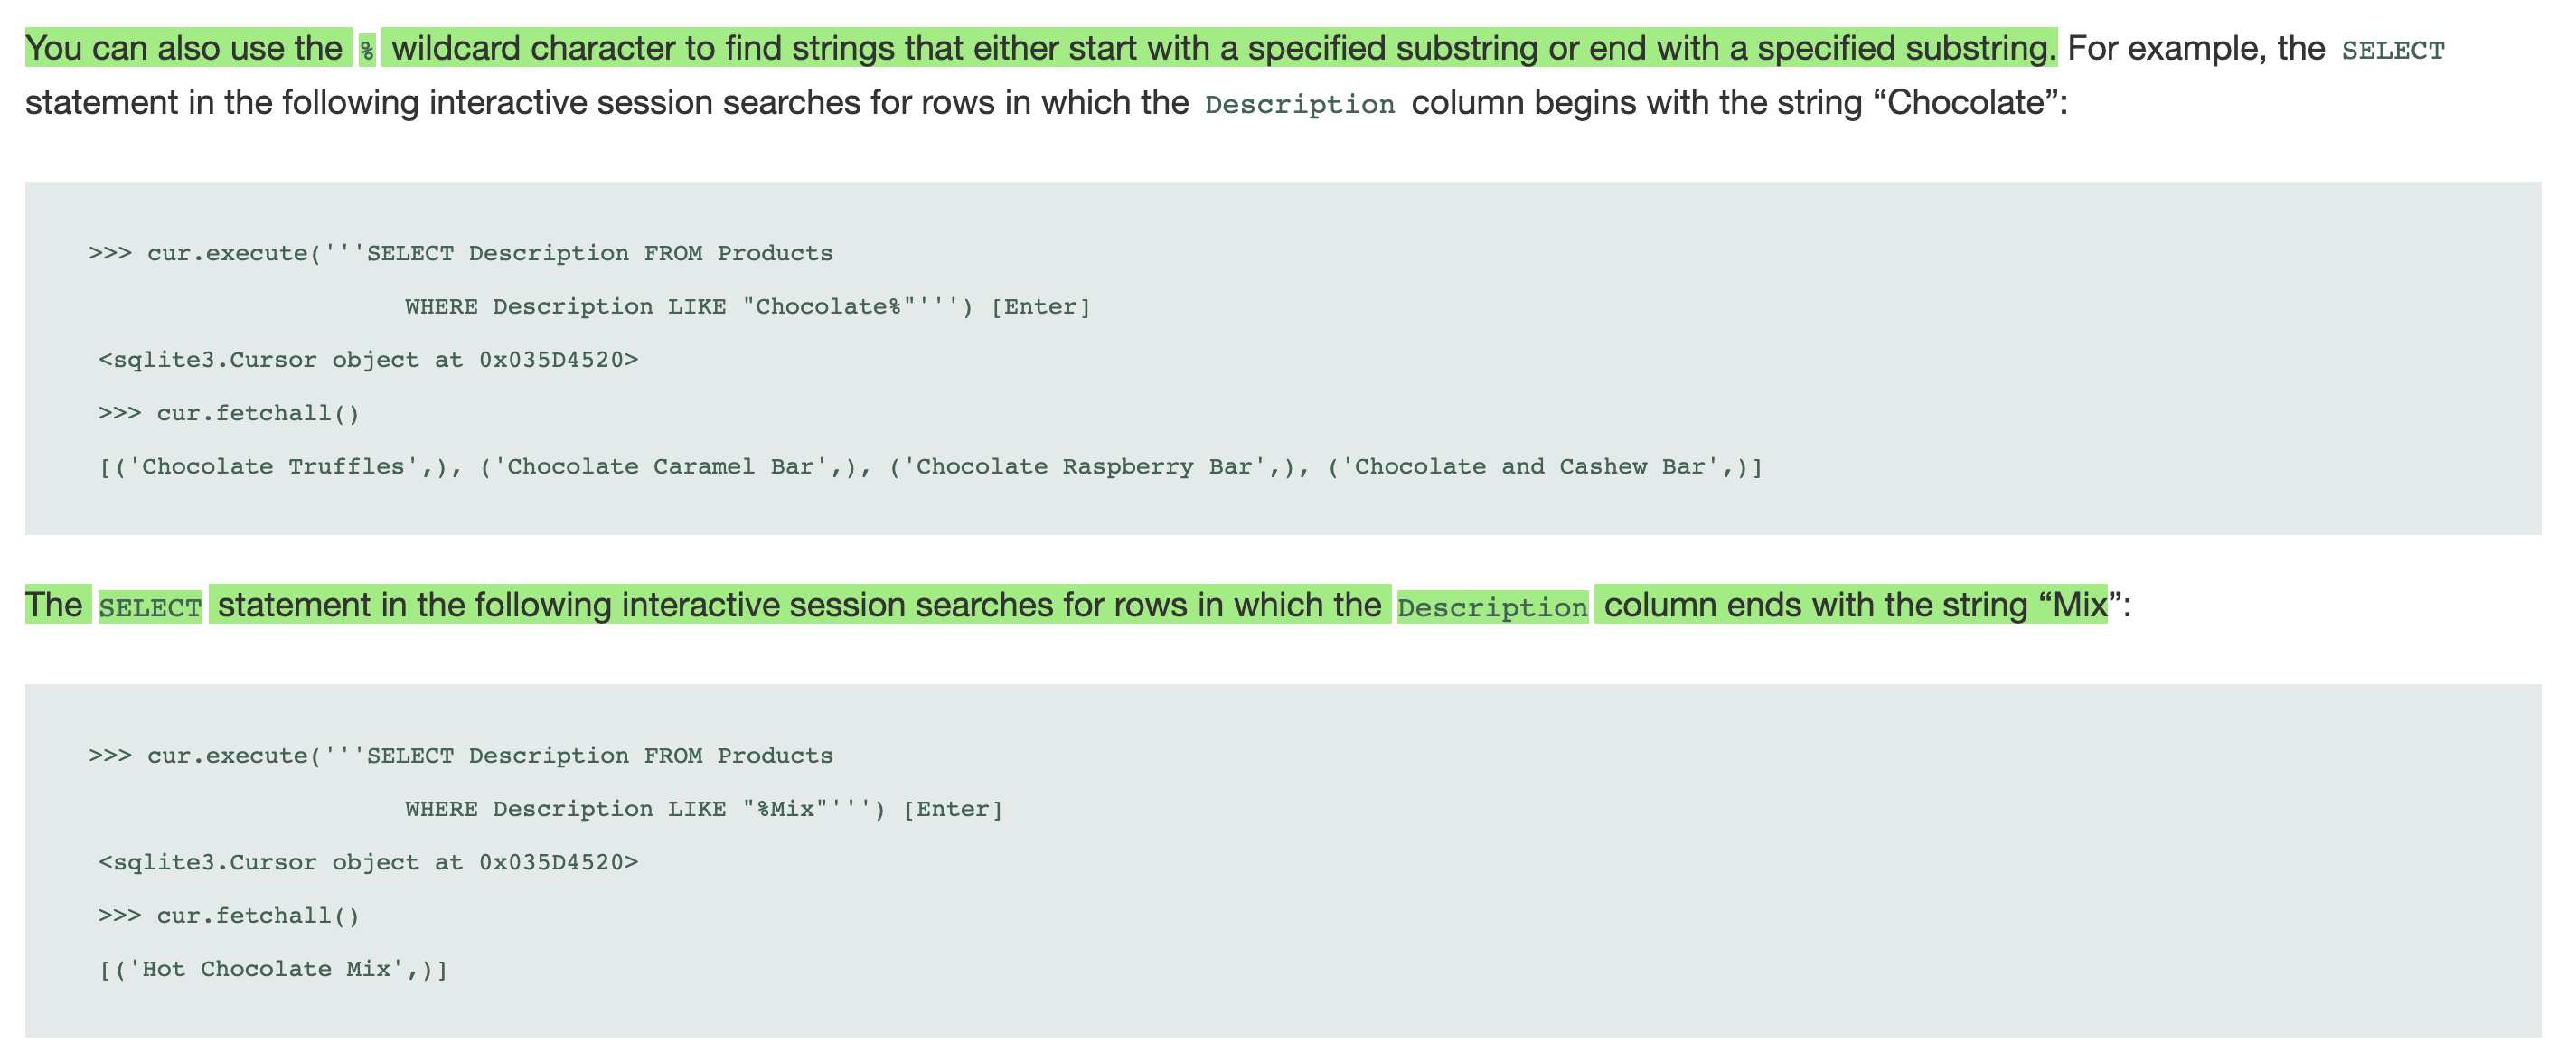

In [8]:
#You can combine the NOT operator and the LIKE operator 
#to search for strings that do not match a particular pattern

cur.execute('''SELECT Description FROM Products
                WHERE Description NOT LIKE "%Bar%"''')

cur.fetchall()

[('Chocolate Truffles',),
 ('Hot Chocolate Mix',),
 ('Semisweet Chocolate Chips',),
 ('White Chocolate Chips',)]

# Sorting the Results of a SELECT Query

**use the ORDER BY clause**

example ---> **SELECT * FROM Products ORDER BY RetailPrice**


In [11]:
#list will be sorted in ascending order on the RetailPrice column, 
#meaning that the lowest-priced products will appear first

import sqlite3

def main():
    #connect to database
    conn = sqlite3.connect('chocolate.db')
    
    #get cursor
    cur = conn.cursor()
    
    #Select all columns from each row from the Products table.
    cur.execute('''SELECT Description, RetailPrice FROM Products
                    ORDER BY RetailPrice ''')
    
    #fetch results
    results = cur.fetchall()
    
    #display the results
    for row in results:
        print(f'{row[0]:30} {row[1]:5}')
        
    #close the connection
    conn.close()
    
#execute the main function
if __name__ == '__main__':
    main()

Semisweet Chocolate Chips       3.99
White Chocolate Chips           3.99
Dark Chocolate Bar              5.99
Medium Dark Chocolate Bar       5.99
Milk Chocolate Bar              5.99
Chocolate Caramel Bar           6.99
Chocolate Raspberry Bar         6.99
Chocolate and Cashew Bar        9.99
Chocolate Truffles             11.99
Hot Chocolate Mix              12.99


**TO DO IN DESCENDING ORDER**

In [16]:
#list will be sorted in ascending order on the RetailPrice column, 
#meaning that the lowest-priced products will appear first

import sqlite3

def main():
    #connect to database
    conn = sqlite3.connect('chocolate.db')
    
    #get cursor
    cur = conn.cursor()
    
    #Select all columns from each row from the Products table.
    cur.execute('''SELECT Description, RetailPrice FROM Products
                    WHERE RetailPrice > 9.00
                    ORDER BY RetailPrice DESC''')
    
    #fetch results
    results = cur.fetchall()
    
    #display the results
    for row in results:
        print(f'{row[0]:} {row[1]:5}')
        
    #close the connection
    conn.close()
    
#execute the main function
if __name__ == '__main__':
    main()

Hot Chocolate Mix 12.99
Chocolate Truffles 11.99
Chocolate and Cashew Bar  9.99


# Aggregate Functions

**An aggregate function performs a calculation on a set of values from a database table and returns a single value.The AVG function calculates the average value of a column that contains numeric values**

In [17]:
#connect to database
conn = sqlite3.connect('chocolate.db')

#get cursor
cur = conn.cursor()

In [20]:
cur.execute('''SELECT AVG(RetailPrice) FROM Products''')

cur.fetchone()

#This statement produces a single value: the average of all the values in the RetailPrice column

(7.489999999999999,)

In [23]:
#example that calculates the average price of all the products having a description that contains the word “Bar”

cur.execute('''SELECT AVG(RetailPrice) FROM Products WHERE Description LIKE "%Bar%"''')

cur.fetchone()

(6.990000000000001,)

In [24]:
#Another of the aggregate functions is SUM, which calculates the sum of a column that contains numeric values. 

cur.execute('''SELECT SUM(UnitsOnHand) FROM Products''')

cur.fetchone()

(2905,)

In [25]:
#The MIN and MAX functions determine the minimum and maximum values found in a column that contains numeric values.

cur.execute('''SELECT MIN(RetailPrice) FROM Products''')

cur.fetchone()

(3.99,)

In [26]:
cur.execute('''SELECT MAX(RetailPrice) FROM Products''')

cur.fetchone()

(12.99,)

In [27]:
#The COUNT function can be used to determine the number of rows in a table
cur.execute('''SELECT COUNT(*) FROM Products''')

cur.fetchone()


(10,)

In [28]:
#The * simply indicates that you want to count entire rows. 
#Here is another example, which tells us the number of products having a price greater than 9.95

cur.execute('''SELECT COUNT(*) FROM Products WHERE RetailPrice > 9.95''')

cur.fetchone()

(3,)

In [29]:
#In your Python code, the most straightforward way to retrieve that value that 
#is returned from an aggregate function is with the Cursor object’s fetchone method

cur.execute('''SELECT SUM(UnitsOnHand) FROM Products''')

cur.fetchone()

(2905,)

In [33]:
#When a query returns only one value, the fetchone method returns a tuple with one element, 
#which is at index 0. If you want to work with the value, and not the tuple, 
#you have to read the value from the tuple. 

cur.execute('''SELECT SUM(UnitsOnHand) FROM Products''')
result = cur.fetchone()
sum = result[0]

print(sum)

2905


In [38]:
#The code shown in the interactive session is straightforward, but we can simplify it. 
#Because the fetchone method returns a tuple, we can apply the [0] operator directly to the expression 
#that calls the method, 

cur.execute('''SELECT SUM(UnitsOnHand) FROM Products''')
sum = cur.fetchone()[0]
sum




ProgrammingError: Cannot operate on a closed database.

In [39]:
#example of how you can use the MIN, MAX, and AVG functions to find the lowest, highest, 
#and average prices in the Products table.

import sqlite3

def main():
    #connect to database
    conn = sqlite3.connect('chocolate.db')
    
    #get cursor
    cur = conn.cursor()
    
    # Get the lowest price.
    cur.execute('SELECT MIN(RetailPrice) FROM Products')
    lowest = cur.fetchone()[0]
    
    # Get the highest price.    
    cur.execute('SELECT MAX(RetailPrice) FROM Products')
    highest = cur.fetchone()[0]
    
    # Get the average price.
    cur.execute('SELECT AVG(RetailPrice) FROM Products')
    average = cur.fetchone()[0]
    
    # Display the results.
    print(f'Lowest Price:  ${lowest:.2f}')
    print(f'Highest Price: ${highest:.2f}')
    print(f'Average Price: ${average:.2f}')
    
    # Close the database connection.
    conn.close()
    
#execute the main function
if __name__ == '__main__':
    main()



Lowest Price:  $3.99
Highest Price: $12.99
Average Price: $7.49
